##### Single-Variant

In [ ]:
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Load Iris dataset
iris = datasets.load_iris()
X = iris.data
y = (iris.target == 0).astype(int)  # Binary classification: Setosa vs. not-Setosa

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize the features (important for gradient descent)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


----
loss plot

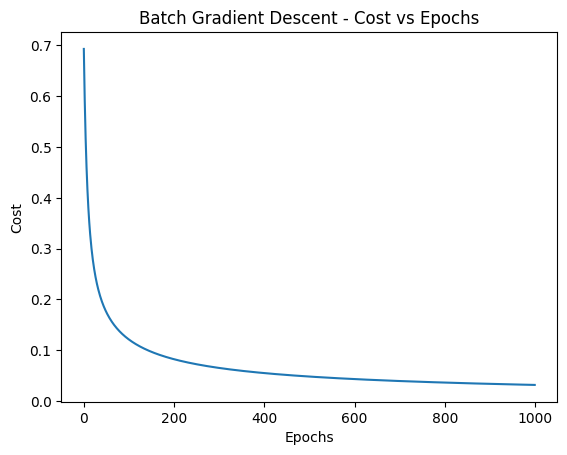

In [ ]:
def batch_gradient_descent(X, y, learning_rate=0.01, epochs=1000):
    m, n = X.shape
    theta = np.zeros(n)
    cost_history = []

    for epoch in range(epochs):
        # Hypothesis function
        h = 1 / (1 + np.exp(-np.dot(X, theta)))

        # Gradient of the cost function
        gradient = (1 / m) * np.dot(X.T, (h - y))

        # Update the parameters
        theta -= learning_rate * gradient

        # Compute the cost
        cost = -(1 / m) * np.sum(y * np.log(h) + (1 - y) * np.log(1 - h))
        cost_history.append(cost)

    return theta, cost_history

# Train with Batch Gradient Descent
theta_batch, cost_batch = batch_gradient_descent(X_train, y_train, learning_rate=0.1, epochs=1000)

# Plot cost vs. epochs
plt.plot(range(1000), cost_batch)
plt.xlabel('Epochs')
plt.ylabel('Cost')
plt.title('Batch Gradient Descent - Cost vs Epochs')
plt.show()


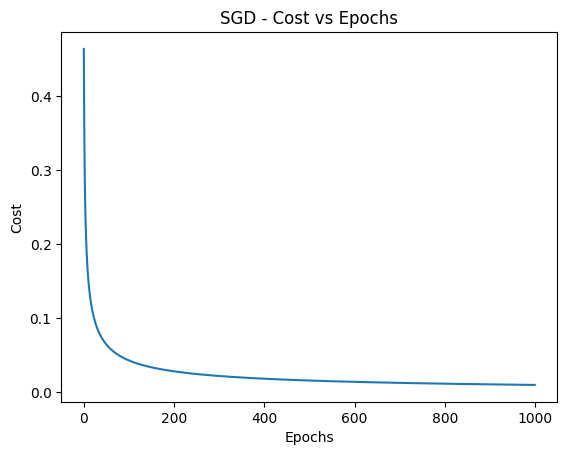

In [ ]:
def stochastic_gradient_descent(X, y, learning_rate=0.01, epochs=1000):
    m, n = X.shape
    theta = np.zeros(n)
    cost_history = []

    for epoch in range(epochs):
        for i in range(m):
            xi = X[i:i+1]
            yi = y[i:i+1]
            h = 1 / (1 + np.exp(-np.dot(xi, theta)))

            # Gradient for single data point
            gradient = xi.T * (h - yi)

            # Update the parameters
            theta -= learning_rate * gradient.flatten()

        # Compute the cost after the full pass through the dataset
        h = 1 / (1 + np.exp(-np.dot(X, theta)))
        cost = -(1 / m) * np.sum(y * np.log(h) + (1 - y) * np.log(1 - h))
        cost_history.append(cost)

    return theta, cost_history

# Train with Stochastic Gradient Descent
theta_sgd, cost_sgd = stochastic_gradient_descent(X_train, y_train, learning_rate=0.005, epochs=1000)

# Plot cost vs. epochs
plt.plot(range(1000), cost_sgd)
plt.xlabel('Epochs')
plt.ylabel('Cost')
plt.title('SGD - Cost vs Epochs')
plt.show()


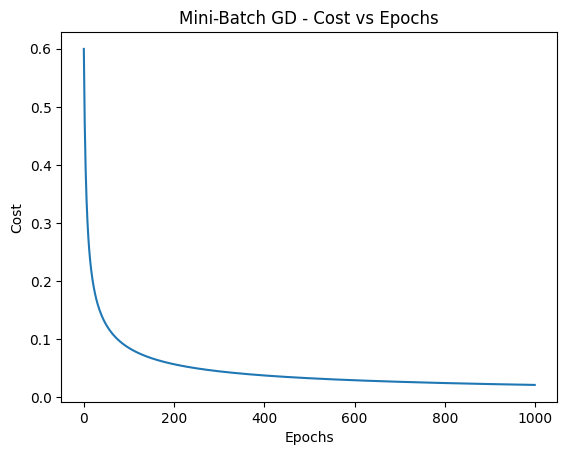

In [ ]:
def mini_batch_gradient_descent(X, y, batch_size=32, learning_rate=0.01, epochs=1000):
    m, n = X.shape
    theta = np.zeros(n)
    cost_history = []

    for epoch in range(epochs):
        # Shuffle the dataset at the beginning of each epoch
        indices = np.random.permutation(m)
        X_shuffled = X[indices]
        y_shuffled = y[indices]

        for i in range(0, m, batch_size):
            X_batch = X_shuffled[i:i+batch_size]
            y_batch = y_shuffled[i:i+batch_size]

            # Hypothesis function
            h = 1 / (1 + np.exp(-np.dot(X_batch, theta)))

            # Gradient for mini-batch
            gradient = (1 / batch_size) * np.dot(X_batch.T, (h - y_batch))

            # Update the parameters
            theta -= learning_rate * gradient

        # Compute the cost after the full pass through the dataset
        h = 1 / (1 + np.exp(-np.dot(X, theta)))
        cost = -(1 / m) * np.sum(y * np.log(h) + (1 - y) * np.log(1 - h))
        cost_history.append(cost)

    return theta, cost_history

# Train with Mini-Batch Gradient Descent
theta_minibatch, cost_minibatch = mini_batch_gradient_descent(X_train, y_train, batch_size=32, learning_rate=0.05, epochs=1000)

# Plot cost vs. epochs
plt.plot(range(1000), cost_minibatch)
plt.xlabel('Epochs')
plt.ylabel('Cost')
plt.title('Mini-Batch GD - Cost vs Epochs')
plt.show()


In [ ]:
# Predict using the learned parameters
def predict(X, theta):
    return (1 / (1 + np.exp(-np.dot(X, theta))) >= 0.5).astype(int)

# Test accuracy
y_pred_batch = predict(X_test, theta_batch)
y_pred_sgd = predict(X_test, theta_sgd)
y_pred_minibatch = predict(X_test, theta_minibatch)

# Accuracy
def accuracy(y_true, y_pred):
    return np.mean(y_true == y_pred) * 100

print(f'Batch GD Accuracy: {accuracy(y_test, y_pred_batch)}%')
print(f'SGD Accuracy: {accuracy(y_test, y_pred_sgd)}%')
print(f'Mini-Batch GD Accuracy: {accuracy(y_test, y_pred_minibatch)}%')


Batch GD Accuracy: 100.0%
SGD Accuracy: 100.0%
Mini-Batch GD Accuracy: 100.0%


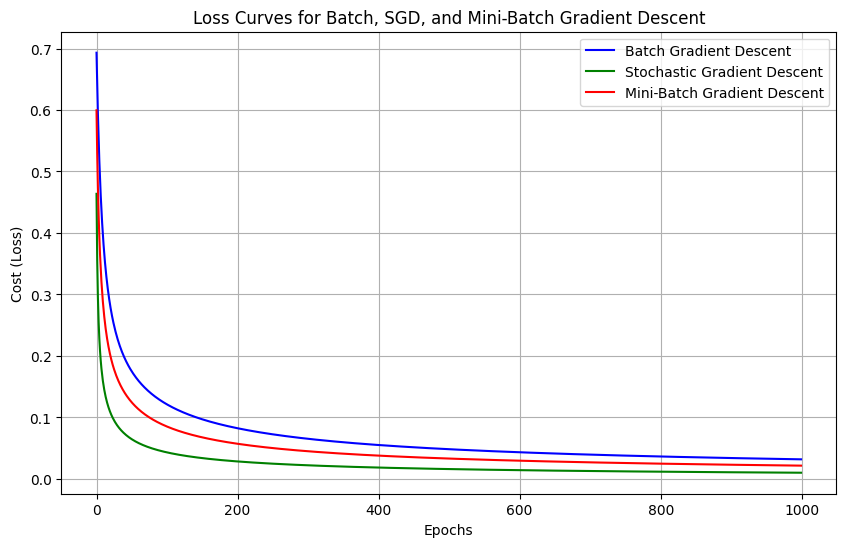

In [ ]:
import matplotlib.pyplot as plt

# Plot the cost (loss) curves for all methods
plt.figure(figsize=(10, 6))
plt.plot(range(len(cost_batch)), cost_batch, label="Batch Gradient Descent", color='blue')
plt.plot(range(len(cost_sgd)), cost_sgd, label="Stochastic Gradient Descent", color='green')
plt.plot(range(len(cost_minibatch)), cost_minibatch, label="Mini-Batch Gradient Descent", color='red')

plt.xlabel('Epochs')
plt.ylabel('Cost (Loss)')
plt.title('Loss Curves for Batch, SGD, and Mini-Batch Gradient Descent')
plt.legend()
plt.grid(True)
plt.show()


----
Gradient visualization

In [ ]:
def batch_gradient_descent_with_tracking(X, y, learning_rate=0.01, epochs=1000):
    m, n = X.shape
    theta = np.zeros(n)
    cost_history = []
    theta_history = []  # Store theta values for each epoch

    for epoch in range(epochs):
        # Hypothesis function
        h = 1 / (1 + np.exp(-np.dot(X, theta)))

        # Gradient of the cost function
        gradient = (1 / m) * np.dot(X.T, (h - y))

        # Update the parameters
        theta -= learning_rate * gradient

        # Store theta values for tracking
        theta_history.append(theta.copy())

        # Compute the cost
        cost = -(1 / m) * np.sum(y * np.log(h) + (1 - y) * np.log(1 - h))
        cost_history.append(cost)

    return theta, cost_history, np.array(theta_history)

def stochastic_gradient_descent_with_tracking(X, y, learning_rate=0.01, epochs=1000):
    m, n = X.shape
    theta = np.zeros(n)
    cost_history = []
    theta_history = []  # Store theta values for each epoch

    for epoch in range(epochs):
        for i in range(m):
            xi = X[i:i+1]
            yi = y[i:i+1]
            h = 1 / (1 + np.exp(-np.dot(xi, theta)))

            # Gradient for single data point
            gradient = xi.T * (h - yi)

            # Update the parameters
            theta -= learning_rate * gradient.flatten()

        # Store theta values for tracking
        theta_history.append(theta.copy())

        # Compute the cost after the full pass through the dataset
        h = 1 / (1 + np.exp(-np.dot(X, theta)))
        cost = -(1 / m) * np.sum(y * np.log(h) + (1 - y) * np.log(1 - h))
        cost_history.append(cost)

    return theta, cost_history, np.array(theta_history)

def mini_batch_gradient_descent_with_tracking(X, y, batch_size=32, learning_rate=0.01, epochs=1000):
    m, n = X.shape
    theta = np.zeros(n)
    cost_history = []
    theta_history = []  # Store theta values for each epoch

    for epoch in range(epochs):
        # Shuffle the dataset at the beginning of each epoch
        indices = np.random.permutation(m)
        X_shuffled = X[indices]
        y_shuffled = y[indices]

        for i in range(0, m, batch_size):
            X_batch = X_shuffled[i:i+batch_size]
            y_batch = y_shuffled[i:i+batch_size]

            # Hypothesis function
            h = 1 / (1 + np.exp(-np.dot(X_batch, theta)))

            # Gradient for mini-batch
            gradient = (1 / batch_size) * np.dot(X_batch.T, (h - y_batch))

            # Update the parameters
            theta -= learning_rate * gradient

        # Store theta values for tracking
        theta_history.append(theta.copy())

        # Compute the cost after the full pass through the dataset
        h = 1 / (1 + np.exp(-np.dot(X, theta)))
        cost = -(1 / m) * np.sum(y * np.log(h) + (1 - y) * np.log(1 - h))
        cost_history.append(cost)

    return theta, cost_history, np.array(theta_history)


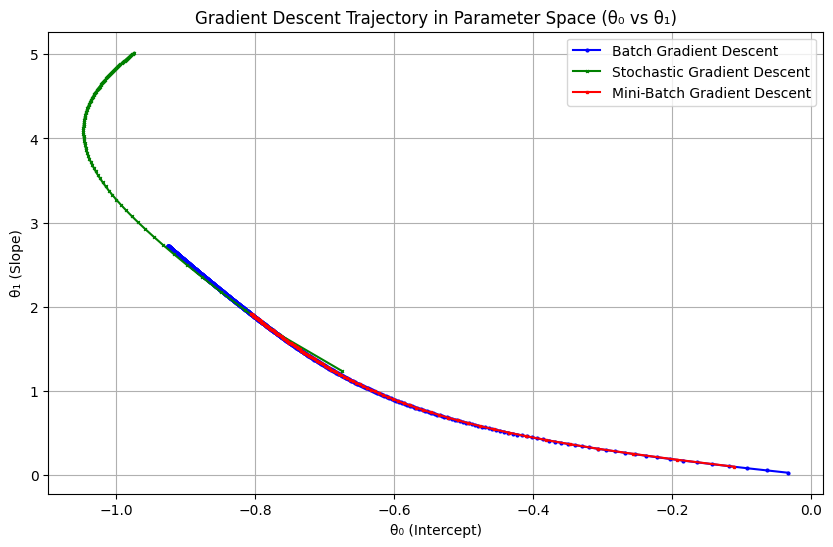

In [ ]:
# Get the tracked parameters for each method
_, _, theta_batch_history = batch_gradient_descent_with_tracking(X_train, y_train, learning_rate=0.1, epochs=1000)
_, _, theta_sgd_history = stochastic_gradient_descent_with_tracking(X_train, y_train, learning_rate=0.1, epochs=100)
_, _, theta_minibatch_history = mini_batch_gradient_descent_with_tracking(X_train, y_train, batch_size=32, learning_rate=0.1, epochs=100)

# Plot the parameter space trajectory
plt.figure(figsize=(10, 6))

# Batch GD - Plotting theta values (theta_0 vs theta_1)
plt.plot(theta_batch_history[:, 0], theta_batch_history[:, 1], label="Batch Gradient Descent", color='blue', marker='o', markersize=2)

# SGD - Plotting theta values (theta_0 vs theta_1)
plt.plot(theta_sgd_history[:, 0], theta_sgd_history[:, 1], label="Stochastic Gradient Descent", color='green', marker='x', markersize=2)

# Mini-Batch GD - Plotting theta values (theta_0 vs theta_1)
plt.plot(theta_minibatch_history[:, 0], theta_minibatch_history[:, 1], label="Mini-Batch Gradient Descent", color='red', marker='s', markersize=2)

# Add labels and title
plt.xlabel('θ₀ (Intercept)')
plt.ylabel('θ₁ (Slope)')
plt.title('Gradient Descent Trajectory in Parameter Space (θ₀ vs θ₁)')
plt.legend()
plt.grid(True)
plt.show()


----
##### Multiple-Variant Learning [number of features == 2 columns]

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load the California housing dataset from sklearn
california_housing = datasets.fetch_california_housing()
X = california_housing.data[:, :2]  # Select the first two features
y = california_housing.target

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features (important for gradient descent)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

print(X_train.shape, y_train.shape)  # Should print (train_samples, 2)


(16512, 2) (16512,)


(16512, 2) (16512,)


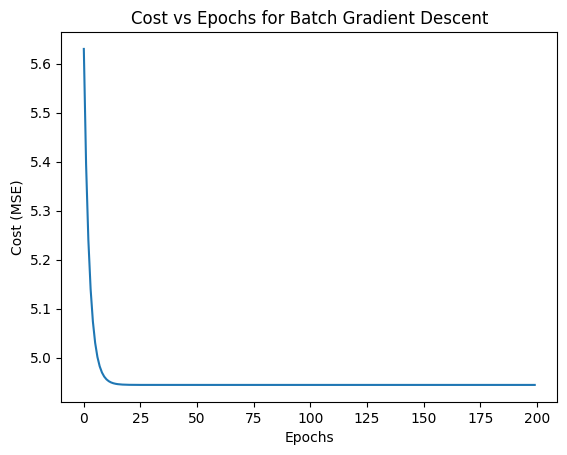

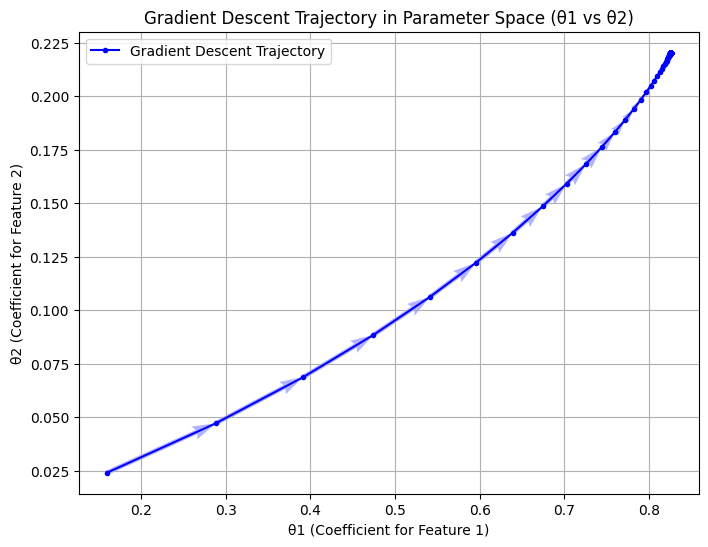

In [ ]:
# @title Pure Direction (Non-contour Gradient Space)

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load the California housing dataset from sklearn
california_housing = datasets.fetch_california_housing()
X = california_housing.data[:, :2]  # Select the first two features (Feature 1 and Feature 2)
y = california_housing.target

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features (important for gradient descent)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

print(X_train.shape, y_train.shape)  # Should print (train_samples, 2)

# Batch Gradient Descent with Tracking of Parameters
def batch_gradient_descent_with_tracking(X, y, learning_rate=0.01, epochs=1000):
    m, n = X.shape
    theta = np.zeros(n)  # Initialize parameters (theta)
    cost_history = []
    theta_history = []  # Store theta values at each iteration

    for epoch in range(epochs):
        # Compute the hypothesis (predictions)
        h = np.dot(X, theta)

        # Compute the gradient
        gradient = (2 / m) * np.dot(X.T, (h - y))

        # Update the parameters (theta)
        theta -= learning_rate * gradient

        # Store the parameters for visualization
        theta_history.append(theta.copy())

        # Compute the cost (Mean Squared Error)
        cost = (1 / m) * np.sum((h - y) ** 2)
        cost_history.append(cost)

    return theta, cost_history, np.array(theta_history)

# Train the model using batch gradient descent
theta_batch, cost_batch, theta_batch_history = batch_gradient_descent_with_tracking(X_train, y_train, learning_rate=0.1, epochs=200)

# Plot cost history
plt.plot(range(200), cost_batch)
plt.xlabel('Epochs')
plt.ylabel('Cost (MSE)')
plt.title('Cost vs Epochs for Batch Gradient Descent')
plt.show()

# Visualizing the Gradient Directions in Parameter Space (θ1 vs θ2)
plt.figure(figsize=(8, 6))

# Plot the parameter space trajectory (θ1 vs θ2)
plt.plot(theta_batch_history[:, 0], theta_batch_history[:, 1], label="Gradient Descent Trajectory", color='blue', marker='o', markersize=3)

# Plot the gradient direction for each step in the gradient descent process
for i in range(1, len(theta_batch_history)):
    # Get the parameters (theta) at step i-1 and i
    theta_prev = theta_batch_history[i - 1]
    theta_curr = theta_batch_history[i]

    # Compute the change in the parameters (gradient step)
    d_theta_1 = theta_curr[0] - theta_prev[0]
    d_theta_2 = theta_curr[1] - theta_prev[1]

    # Compute the gradient vector direction
    plt.quiver(theta_prev[0], theta_prev[1], d_theta_1, d_theta_2, angles='xy', scale_units='xy', scale=1, color='blue', alpha=0.3)

# Add labels and title
plt.xlabel('θ1 (Coefficient for Feature 1)')
plt.ylabel('θ2 (Coefficient for Feature 2)')
plt.title('Gradient Descent Trajectory in Parameter Space (θ1 vs θ2)')
plt.legend()
plt.grid(True)
plt.show()


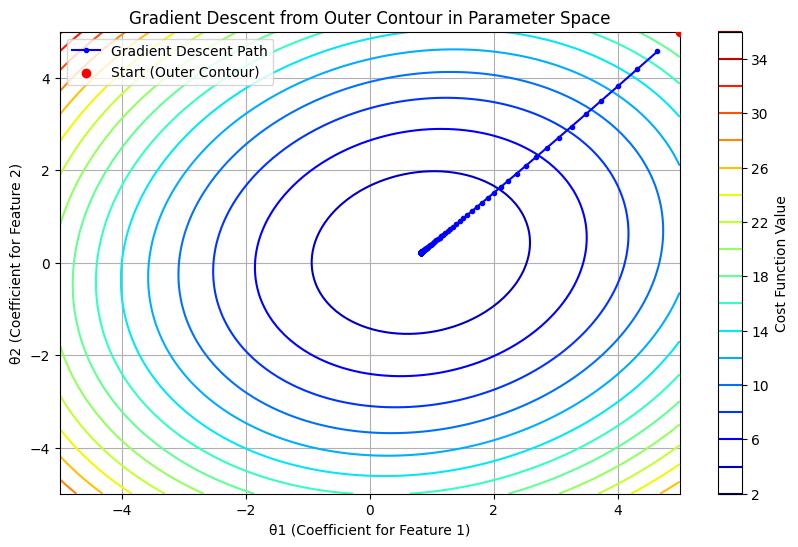

In [ ]:
# @title Gradient Direction w/ Contour Gradient Space
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load the California housing dataset (we'll use the first two features)
california_housing = datasets.fetch_california_housing()
X = california_housing.data[:, :2]  # Select only Feature 1 and Feature 2
y = california_housing.target

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features (important for gradient descent)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define the MSE cost function and its gradients
def compute_cost(theta, X, y):
    m = len(y)
    predictions = X.dot(theta)
    cost = (1 / (2 * m)) * np.sum(np.square(predictions - y))
    return cost

def compute_gradients(theta, X, y):
    m = len(y)
    gradients = (1 / m) * X.T.dot(X.dot(theta) - y)
    return gradients

# Perform Gradient Descent starting from an outer point (initial guess far from the optimal solution)
def gradient_descent(X, y, learning_rate=0.1, epochs=200, initial_theta=None):
    m, n = X.shape
    if initial_theta is None:
        theta = np.zeros(n, dtype=np.float64)  # Initialize parameters to zero by default
    else:
        theta = initial_theta.astype(np.float64)  # Use the provided initial guess, ensuring it's float64

    cost_history = []
    theta_history = []

    for epoch in range(epochs):
        gradients = compute_gradients(theta, X, y)
        theta -= learning_rate * gradients  # Update the parameters
        cost_history.append(compute_cost(theta, X, y))
        theta_history.append(theta.copy())

    return theta, cost_history, np.array(theta_history)


# Run gradient descent from an outer contour (initial guess far from the optimal solution)
initial_theta_outer = np.array([5, 5])  # Start far from the optimal solution
theta_final, cost_history, theta_history = gradient_descent(X_train, y_train, learning_rate=0.1, epochs=200, initial_theta=initial_theta_outer)

# Plot the cost function contour (as concentric circles) in the parameter space
theta_1_vals = np.linspace(-5, 5, 100)
theta_2_vals = np.linspace(-5, 5, 100)
theta_1_grid, theta_2_grid = np.meshgrid(theta_1_vals, theta_2_vals)
cost_grid = np.zeros_like(theta_1_grid)

for i in range(len(theta_1_vals)):
    for j in range(len(theta_2_vals)):
        theta = np.array([theta_1_grid[i, j], theta_2_grid[i, j]])
        cost_grid[i, j] = compute_cost(theta, X_train, y_train)

# Plot contour lines for the cost function
plt.figure(figsize=(10, 6))
cp = plt.contour(theta_1_grid, theta_2_grid, cost_grid, levels=20, cmap='jet')
plt.colorbar(cp, label='Cost Function Value')

# Plot the gradient descent trajectory (θ1 vs θ2) from the outer contour
theta_history = np.array(theta_history)
plt.plot(theta_history[:, 0], theta_history[:, 1], color='blue', marker='o', markersize=3, label="Gradient Descent Path")

# Mark the initial point (outer contour start)
plt.scatter(initial_theta_outer[0], initial_theta_outer[1], color='red', label="Start (Outer Contour)", zorder=5)

# Add labels and title
plt.xlabel('θ1 (Coefficient for Feature 1)')
plt.ylabel('θ2 (Coefficient for Feature 2)')
plt.title('Gradient Descent from Outer Contour in Parameter Space')
plt.legend()
plt.grid(True)
plt.show()


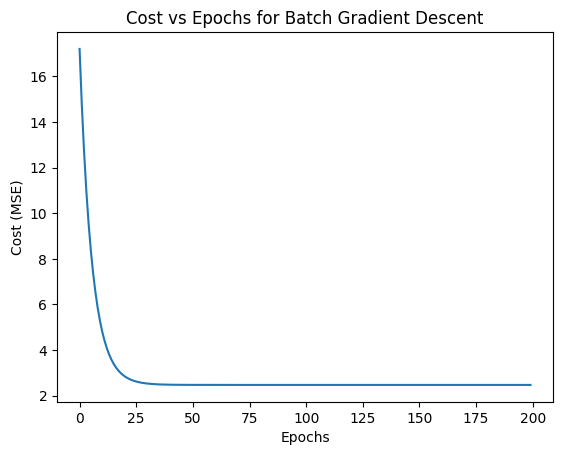

In [ ]:
# Plot cost history
plt.plot(range(200), cost_history)
plt.xlabel('Epochs')
plt.ylabel('Cost (MSE)')
plt.title('Cost vs Epochs for Batch Gradient Descent')
plt.show()

----
#####GD vs Minibatch GD vs SGD

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load the California housing dataset (we'll use the first two features)
# california_housing = datasets.fetch_california_housing()
# X = california_housing.data[:, :2]  # Select only Feature 1 and Feature 2
# y = california_housing.target

# # Split into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # Standardize the features (important for gradient descent)
# scaler = StandardScaler()
# X_train = scaler.fit_transform(X_train)
# X_test = scaler.transform(X_test)

# Define the MSE cost function and its gradients
def compute_cost(theta, X, y):
    m = len(y)
    predictions = X.dot(theta)
    cost = (1 / (2 * m)) * np.sum(np.square(predictions - y))
    return cost

def compute_gradients(theta, X, y):
    m = len(y)
    gradients = (1 / m) * X.T.dot(X.dot(theta) - y)
    return gradients

# Perform Batch Gradient Descent (BGD)
def gradient_descent(X, y, learning_rate=0.1, epochs=200, initial_theta=None):
    m, n = X.shape
    if initial_theta is None:
        theta = np.zeros(n, dtype=np.float64)  # Initialize parameters to zero by default
    else:
        theta = initial_theta.astype(np.float64)  # Use the provided initial guess, ensuring it's float64

    cost_history = []
    theta_history = []

    for epoch in range(epochs):
        gradients = compute_gradients(theta, X, y)
        theta -= learning_rate * gradients  # Update the parameters
        cost_history.append(compute_cost(theta, X, y))
        theta_history.append(theta.copy())

    return theta, cost_history, np.array(theta_history)

# Perform Mini-Batch Gradient Descent (MBGD)
def mini_batch_gradient_descent(X, y, learning_rate=0.1, epochs=200, batch_size=32, initial_theta=None):
    m, n = X.shape
    if initial_theta is None:
        theta = np.zeros(n, dtype=np.float64)  # Initialize parameters to zero by default
    else:
        theta = initial_theta.astype(np.float64)  # Use the provided initial guess, ensuring it's float64

    cost_history = []
    theta_history = []

    for epoch in range(epochs):
        # Shuffle the data and process in mini-batches
        indices = np.random.permutation(m)
        X_shuffled = X[indices]
        y_shuffled = y[indices]

        for i in range(0, m, batch_size):
            xi = X_shuffled[i:i+batch_size]
            yi = y_shuffled[i:i+batch_size]

            gradients = compute_gradients(theta, xi, yi)
            theta -= learning_rate * gradients
        cost_history.append(compute_cost(theta, X, y))
        theta_history.append(theta.copy())

    return theta, cost_history, np.array(theta_history)


# Perform Stochastic Gradient Descent (SGD)
def stochastic_gradient_descent(X, y, learning_rate=0.1, epochs=200, initial_theta=None):
    m, n = X.shape
    if initial_theta is None:
        theta = np.zeros(n, dtype=np.float64)  # Initialize parameters to zero by default
    else:
        theta = initial_theta.astype(np.float64)  # Use the provided initial guess, ensuring it's float64

    cost_history = []
    theta_history = []

    for epoch in range(epochs):
        for i in range(m):
            # Select a random sample (stochastic)
            random_index = np.random.randint(m)
            xi = X[random_index:random_index+1]
            yi = y[random_index:random_index+1]

            gradients = compute_gradients(theta, xi, yi)
            theta -= learning_rate * gradients
        cost_history.append(compute_cost(theta, X, y))
        theta_history.append(theta.copy())

    return theta, cost_history, np.array(theta_history)

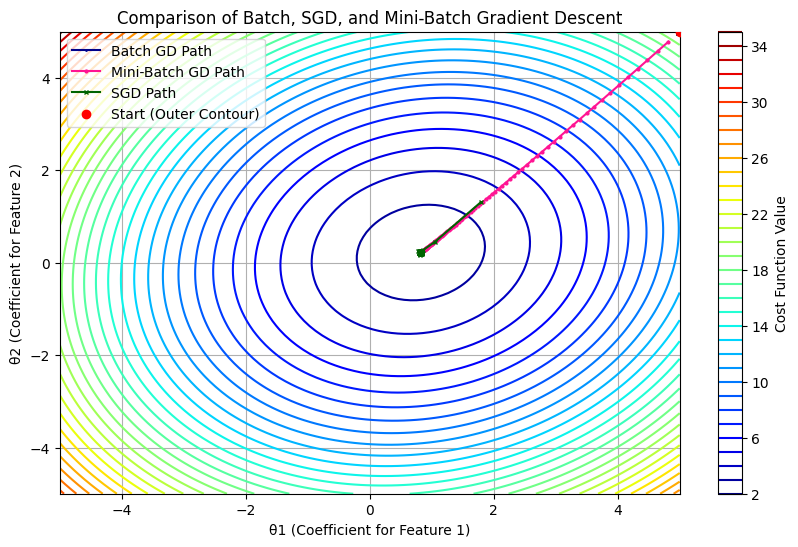

In [ ]:
# Run gradient descent from an outer contour (initial guess far from the optimal solution)
initial_theta_outer = np.array([5, 5])  # Start far from the optimal solution
theta_final_bgd, cost_history_bgd, theta_history_bgd = gradient_descent(X_train, y_train, learning_rate=0.01, epochs=100, initial_theta=initial_theta_outer)
theta_final_mbgd, cost_history_mbgd, theta_history_mbgd = mini_batch_gradient_descent(X_train, y_train, learning_rate=0.0001, epochs=100, batch_size=32, initial_theta=initial_theta_outer)
theta_final_sgd, cost_history_sgd, theta_history_sgd = stochastic_gradient_descent(X_train, y_train, learning_rate=0.0001, epochs=100, initial_theta=initial_theta_outer)

# Plot the cost function contour (as concentric circles) in the parameter space
theta_1_vals = np.linspace(-5, 5, 100)
theta_2_vals = np.linspace(-5, 5, 100)
# theta_1_vals = np.linspace(-1, 1, 100)
# theta_2_vals = np.linspace(-1, 1, 100)
theta_1_grid, theta_2_grid = np.meshgrid(theta_1_vals, theta_2_vals)
cost_grid = np.zeros_like(theta_1_grid)

for i in range(len(theta_1_vals)):
    for j in range(len(theta_2_vals)):
        theta = np.array([theta_1_grid[i, j], theta_2_grid[i, j]])
        cost_grid[i, j] = compute_cost(theta, X_train, y_train)

# Plot contour lines for the cost function
plt.figure(figsize=(10, 6))
cp = plt.contour(theta_1_grid, theta_2_grid, cost_grid, levels=32, cmap='jet')
plt.colorbar(cp, label='Cost Function Value')

# Plot the paths for BGD, SGD, and MBGD
theta_history_bgd = np.array(theta_history_bgd)
theta_history_sgd = np.array(theta_history_sgd)
theta_history_mbgd = np.array(theta_history_mbgd)

# BGD path
plt.plot(theta_history_bgd[:, 0], theta_history_bgd[:, 1], color='darkblue', marker='o', markersize=1, label="Batch GD Path")

# MBGD path
plt.plot(theta_history_mbgd[:, 0], theta_history_mbgd[:, 1], color='deeppink', marker='o', markersize=2, label="Mini-Batch GD Path")

# SGD path
plt.plot(theta_history_sgd[:, 0], theta_history_sgd[:, 1], color='darkgreen', marker='x', markersize=3, label="SGD Path")

# Mark the initial point (outer contour start)
plt.scatter(initial_theta_outer[0], initial_theta_outer[1], color='red', label="Start (Outer Contour)", zorder=5)

# Add labels and title
plt.xlabel('θ1 (Coefficient for Feature 1)')
plt.ylabel('θ2 (Coefficient for Feature 2)')
plt.title('Comparison of Batch, SGD, and Mini-Batch Gradient Descent')
plt.legend()
plt.grid(True)
plt.show()

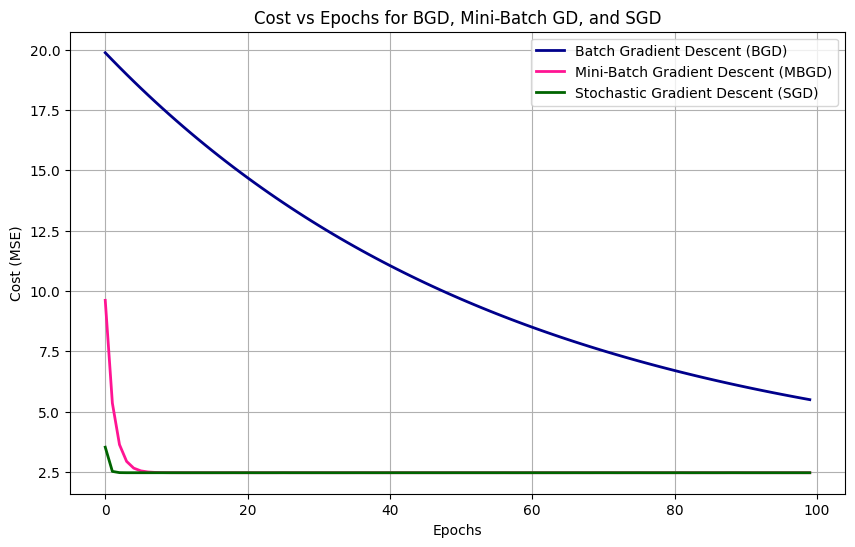

In [ ]:
# Plot cost history for BGD, SGD, and MBGD
plt.figure(figsize=(10, 6))

# Plot the cost histories
# plt.plot(range(100), cost_history_bgd, label="Batch Gradient Descent (BGD)", color='darkblue', linewidth=2)
plt.plot(range(100), cost_history_bgd, label="Batch Gradient Descent (BGD)", color='darkblue', linewidth=2)
plt.plot(range(100), cost_history_mbgd, label="Mini-Batch Gradient Descent (MBGD)", color='deeppink', linewidth=2)
plt.plot(range(100), cost_history_sgd, label="Stochastic Gradient Descent (SGD)", color='darkgreen', linewidth=2)

# Add labels and title
plt.xlabel('Epochs')
plt.ylabel('Cost (MSE)')
plt.title('Cost vs Epochs for BGD, Mini-Batch GD, and SGD')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()

----
##### Iris dataset (gradient contour) [number of feature > 2 columns]

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load the Iris dataset (using only the first two features)
iris = load_iris()
# Select only 2 Features to observe gradient surface from [sepal length, sepal width, petal length, petal width]
# X = iris.data[:, 1:3]
X = iris.data[:, [0, 1]]
y = iris.target

# Simplify the problem to a single regression task (e.g., classify 0 vs. 1 and 2)
# We'll treat this as a regression problem, focusing on Feature 1 and Feature 2
# Normalize the target to ensure smooth cost contours
y = y / np.max(y)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features (important for gradient descent)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

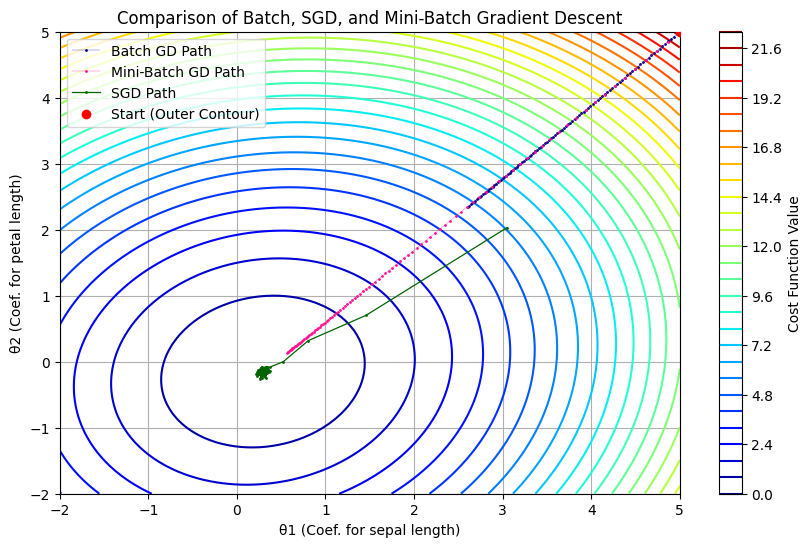

In [ ]:
# Run gradient descent from an outer contour (initial guess far from the optimal solution)
initial_theta_outer = np.array([5, 5])  # Start far from the optimal solution
theta_final_bgd, cost_history_bgd, theta_history_bgd = gradient_descent(X_train, y_train, learning_rate=0.008, epochs=100, initial_theta=initial_theta_outer)
theta_final_mbgd, cost_history_mbgd, theta_history_mbgd = mini_batch_gradient_descent(X_train, y_train, learning_rate=0.008, epochs=100, batch_size=32, initial_theta=initial_theta_outer)
theta_final_sgd, cost_history_sgd, theta_history_sgd = stochastic_gradient_descent(X_train, y_train, learning_rate=0.008, epochs=100, initial_theta=initial_theta_outer)

# Plot the cost function contour (as concentric circles) in the parameter space
theta_1_vals = np.linspace(-2, 5, 100)
theta_2_vals = np.linspace(-2, 5, 100)
# theta_1_vals = np.linspace(-1, 1, 100)
# theta_2_vals = np.linspace(-1, 1, 100)
theta_1_grid, theta_2_grid = np.meshgrid(theta_1_vals, theta_2_vals)
cost_grid = np.zeros_like(theta_1_grid)

for i in range(len(theta_1_vals)):
    for j in range(len(theta_2_vals)):
        theta = np.array([theta_1_grid[i, j], theta_2_grid[i, j]])
        cost_grid[i, j] = compute_cost(theta, X_train, y_train)

# Plot contour lines for the cost function
plt.figure(figsize=(10, 6))
cp = plt.contour(theta_1_grid, theta_2_grid, cost_grid, levels=32, cmap='jet')
plt.colorbar(cp, label='Cost Function Value')

# Plot the paths for BGD, SGD, and MBGD
theta_history_bgd = np.array(theta_history_bgd)
theta_history_sgd = np.array(theta_history_sgd)
theta_history_mbgd = np.array(theta_history_mbgd)

# BGD path
plt.plot(theta_history_bgd[:, 0], theta_history_bgd[:, 1], color='darkblue', marker='o', linewidth=0.2, markersize=1, label="Batch GD Path")
# MBGD path
plt.plot(theta_history_mbgd[:, 0], theta_history_mbgd[:, 1], color='deeppink', marker='o', linewidth=0.2, markersize=1, label="Mini-Batch GD Path")
# SGD path
plt.plot(theta_history_sgd[:, 0], theta_history_sgd[:, 1], color='darkgreen', marker='o', linewidth=0.9, markersize=1, label="SGD Path")
# Mark the initial point (outer contour start)
plt.scatter(initial_theta_outer[0], initial_theta_outer[1], color='red', label="Start (Outer Contour)", zorder=5)

# Add labels and title
plt.xlabel('θ1 (Coef. for sepal length)')
plt.ylabel('θ2 (Coef. for petal length)')
plt.title('Comparison of Batch, SGD, and Mini-Batch Gradient Descent')
plt.legend()
plt.grid(True)
plt.show()

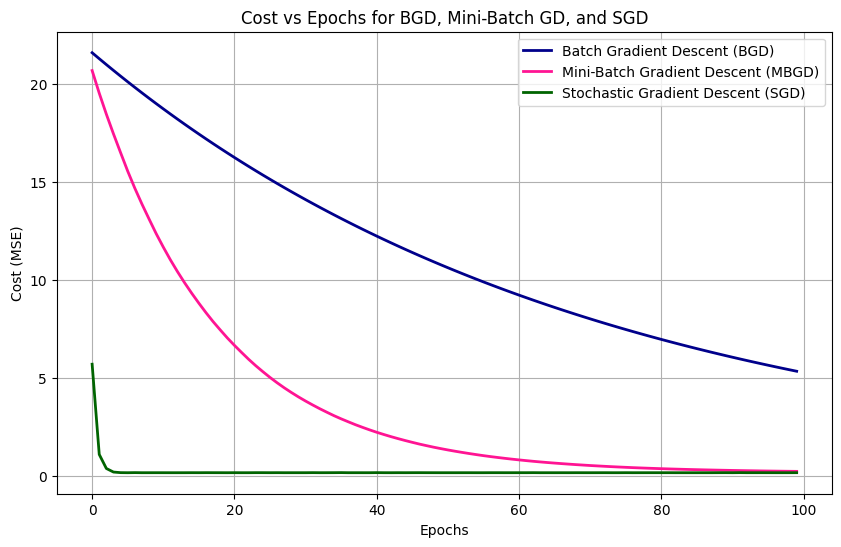

In [ ]:
# Plot cost history for BGD, SGD, and MBGD
plt.figure(figsize=(10, 6))

# Plot the cost histories
# plt.plot(range(100), cost_history_bgd, label="Batch Gradient Descent (BGD)", color='darkblue', linewidth=2)
plt.plot(range(100), cost_history_bgd, label="Batch Gradient Descent (BGD)", color='darkblue', linewidth=2)
plt.plot(range(100), cost_history_mbgd, label="Mini-Batch Gradient Descent (MBGD)", color='deeppink', linewidth=2)
plt.plot(range(100), cost_history_sgd, label="Stochastic Gradient Descent (SGD)", color='darkgreen', linewidth=2)

# Add labels and title
plt.xlabel('Epochs')
plt.ylabel('Cost (MSE)')
plt.title('Cost vs Epochs for BGD, Mini-Batch GD, and SGD')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()

----
##### California Housing dataset (gradient contour) [number of feature > 2 columns]

In [ ]:
# @title Default Population-AvgOccupied (Fix)
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load the California Housing dataset
california_housing = fetch_california_housing()
X = california_housing.data[:, [4, 5]]  # Use the first four features for simplicity
y = california_housing.target

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features (important for gradient descent)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Add intercept term to X_train and X_test
# X_train_b = np.c_[np.ones((X_train.shape[0], 1)), X_train]  # Add a bias column
X_test_b = np.c_[np.ones((X_test.shape[0], 1)), X_test]  # Add a bias column

# Initialize parameters and run SGD
# initial_theta = np.zeros(X_train_b.shape[1])  # Initialize weights to zero

In [ ]:
# Convert the Bunch object to a pandas DataFrame
california_housing_df = pd.DataFrame(california_housing.data, columns=california_housing.feature_names)
california_housing_df['target'] = california_housing.target

california_housing_df

# Now you can use the describe method
# california_housing_df.describe()

MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0      8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1      8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2      7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3      5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4      3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   
...       ...       ...       ...        ...         ...       ...       ...   
20635  1.5603      25.0  5.045455   1.133333       845.0  2.560606     39.48   
20636  2.5568      18.0  6.114035   1.315789       356.0  3.122807     39.49   
20637  1.7000      17.0  5.205543   1.120092      1007.0  2.325635     39.43   
20638  1.8672      18.0  5.329513   1.171920       741.0  2.123209     39.43   
20639  2.3886      16.0  5.254717   1.162264      1387.0  2.616981     39.37   

       Longitude  target  
0        -122.23   4.526  
1        -122.22   3.585  
2        -122.24   3.521  
3        -122.25   3.413  
4        -122.25   3.422  
...          ...     ...  
20635    -121.09   0.781  
20636    -121.21   0.771  
20637    -121.22   0.923  
20638    -121.32   0.847  
20639    -121.24   0.894  

[20640 rows x 9 columns]

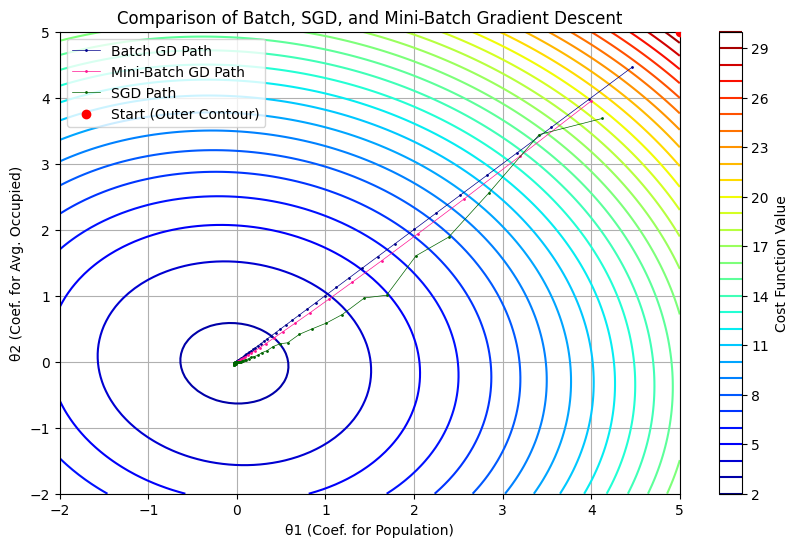

In [ ]:
# Run gradient descent from an outer contour (initial guess far from the optimal solution)
initial_theta_outer = np.array([5, 5])  # Start far from the optimal solution
theta_final_bgd, cost_history_bgd, theta_history_bgd = gradient_descent(X_train, y_train, learning_rate=1e-1, epochs=100, initial_theta=initial_theta_outer)
theta_final_mbgd, cost_history_mbgd, theta_history_mbgd = mini_batch_gradient_descent(X_train, y_train, learning_rate=1e-4, epochs=100, batch_size=8, initial_theta=initial_theta_outer)
theta_final_sgd, cost_history_sgd, theta_history_sgd = stochastic_gradient_descent(X_train, y_train, learning_rate=1e-5, epochs=100, initial_theta=initial_theta_outer)

# Plot the cost function contour (as concentric circles) in the parameter space
theta_1_vals = np.linspace(-2, 5, 100)
theta_2_vals = np.linspace(-2, 5, 100)
# theta_1_vals = np.linspace(-1, 1, 100)
# theta_2_vals = np.linspace(-1, 1, 100)
theta_1_grid, theta_2_grid = np.meshgrid(theta_1_vals, theta_2_vals)
cost_grid = np.zeros_like(theta_1_grid)

for i in range(len(theta_1_vals)):
    for j in range(len(theta_2_vals)):
        theta = np.array([theta_1_grid[i, j], theta_2_grid[i, j]])
        cost_grid[i, j] = compute_cost(theta, X_train, y_train)

# Plot contour lines for the cost function
plt.figure(figsize=(10, 6))
cp = plt.contour(theta_1_grid, theta_2_grid, cost_grid, levels=32, cmap='jet')
plt.colorbar(cp, label='Cost Function Value')

# Plot the paths for BGD, SGD, and MBGD
theta_history_bgd = np.array(theta_history_bgd)
theta_history_sgd = np.array(theta_history_sgd)
theta_history_mbgd = np.array(theta_history_mbgd)

# BGD path
plt.plot(theta_history_bgd[:, 0], theta_history_bgd[:, 1], color='darkblue', marker='o', linewidth=0.5, markersize=1, label="Batch GD Path")
# MBGD path
plt.plot(theta_history_mbgd[:, 0], theta_history_mbgd[:, 1], color='deeppink', marker='o', linewidth=0.5, markersize=1, label="Mini-Batch GD Path")
# SGD path
plt.plot(theta_history_sgd[:, 0], theta_history_sgd[:, 1], color='darkgreen', marker='o', linewidth=0.5, markersize=1, label="SGD Path")
# Mark the initial point (outer contour start)
plt.scatter(initial_theta_outer[0], initial_theta_outer[1], color='red', label="Start (Outer Contour)", zorder=5)

# Add labels and title
plt.xlabel('θ1 (Coef. for Population)')
plt.ylabel('θ2 (Coef. for Avg. Occupied)')
plt.title('Comparison of Batch, SGD, and Mini-Batch Gradient Descent')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# @title Longitude-Latitude
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load the California Housing dataset
california_housing = fetch_california_housing()
X = california_housing.data[:, [6, 7]]  # Longitude-Latitude
y = california_housing.target

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features (important for gradient descent)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Add intercept term to X_train and X_test
# X_train_b = np.c_[np.ones((X_train.shape[0], 1)), X_train]  # Add a bias column
X_test_b = np.c_[np.ones((X_test.shape[0], 1)), X_test]  # Add a bias column

# Initialize parameters and run SGD
# initial_theta = np.zeros(X_train_b.shape[1])  # Initialize weights to zero

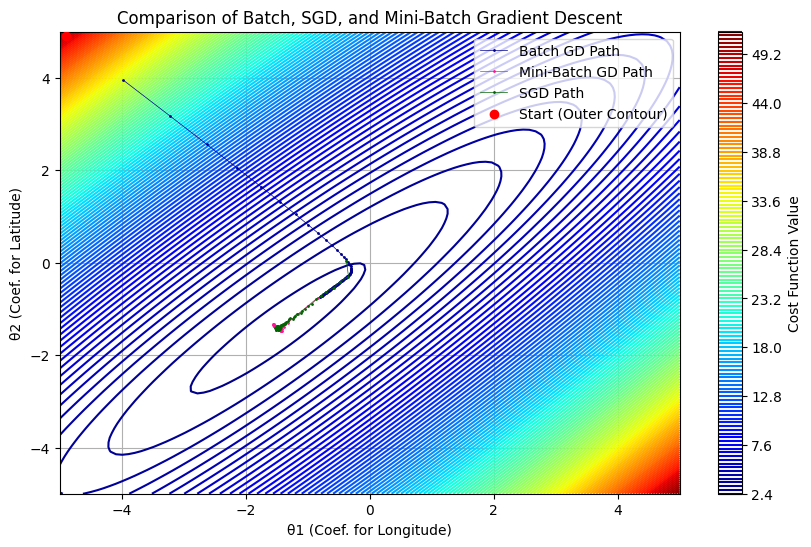

In [ ]:
# Run gradient descent from an outer contour (initial guess far from the optimal solution)
initial_theta_outer = np.array([-4.9, 4.9])  # Start far from the optimal solution
theta_final_bgd, cost_history_bgd, theta_history_bgd = gradient_descent(X_train, y_train, learning_rate=1e-1, epochs=100, initial_theta=initial_theta_outer)
theta_final_mbgd, cost_history_mbgd, theta_history_mbgd = mini_batch_gradient_descent(X_train, y_train, learning_rate=5e-3, epochs=100, batch_size=8, initial_theta=initial_theta_outer)
theta_final_sgd, cost_history_sgd, theta_history_sgd = stochastic_gradient_descent(X_train, y_train, learning_rate=1e-4, epochs=100, initial_theta=initial_theta_outer)

# Plot the cost function contour (as concentric circles) in the parameter space
theta_1_vals = np.linspace(-5, 5, 100)
theta_2_vals = np.linspace(-5, 5, 100)
# theta_1_vals = np.linspace(-1, 1, 100)
# theta_2_vals = np.linspace(-1, 1, 100)
theta_1_grid, theta_2_grid = np.meshgrid(theta_1_vals, theta_2_vals)
cost_grid = np.zeros_like(theta_1_grid)

for i in range(len(theta_1_vals)):
    for j in range(len(theta_2_vals)):
        theta = np.array([theta_1_grid[i, j], theta_2_grid[i, j]])
        cost_grid[i, j] = compute_cost(theta, X_train, y_train)

# Plot contour lines for the cost function
plt.figure(figsize=(10, 6))
cp = plt.contour(theta_1_grid, theta_2_grid, cost_grid, levels=128, cmap='jet')
plt.colorbar(cp, label='Cost Function Value')

# Plot the paths for BGD, SGD, and MBGD
theta_history_bgd = np.array(theta_history_bgd)
theta_history_sgd = np.array(theta_history_sgd)
theta_history_mbgd = np.array(theta_history_mbgd)

# BGD path
plt.plot(theta_history_bgd[:, 0], theta_history_bgd[:, 1], color='darkblue', marker='o', linewidth=0.5, markersize=1, label="Batch GD Path")
# MBGD path
plt.plot(theta_history_mbgd[:, 0], theta_history_mbgd[:, 1], color='deeppink', marker='o', linewidth=0.5, markersize=1, label="Mini-Batch GD Path")
# SGD path
plt.plot(theta_history_sgd[:, 0], theta_history_sgd[:, 1], color='darkgreen', marker='o', linewidth=0.5, markersize=1, label="SGD Path")
# Mark the initial point (outer contour start)
plt.scatter(initial_theta_outer[0], initial_theta_outer[1], color='red', label="Start (Outer Contour)", zorder=5)

# Add labels and title
plt.xlabel('θ1 (Coef. for Longitude)')
plt.ylabel('θ2 (Coef. for Latitude)')
plt.title('Comparison of Batch, SGD, and Mini-Batch Gradient Descent')
plt.legend()
plt.grid(True)
plt.show()

----
##### Momentum into SGD

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load the California housing dataset (we'll use the first two features)
# california_housing = datasets.fetch_california_housing()
# X = california_housing.data[:, :2]  # Select only Feature 1 and Feature 2
# y = california_housing.target

# # Split into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # Standardize the features (important for gradient descent)
# scaler = StandardScaler()
# X_train = scaler.fit_transform(X_train)
# X_test = scaler.transform(X_test)

# Define the MSE cost function and its gradients
def compute_cost(theta, X, y):
    m = len(y)
    predictions = X.dot(theta)
    cost = (1 / (2 * m)) * np.sum(np.square(predictions - y))
    return cost

def compute_gradients(theta, X, y):
    m = len(y)
    gradients = (1 / m) * X.T.dot(X.dot(theta) - y)
    return gradients


# Perform Stochastic Gradient Descent (SGD)
def stochastic_gradient_descent(X, y, learning_rate=0.1, epochs=200, initial_theta=None):
    m, n = X.shape
    if initial_theta is None:
        theta = np.zeros(n, dtype=np.float64)  # Initialize parameters to zero by default
    else:
        theta = initial_theta.astype(np.float64)  # Use the provided initial guess, ensuring it's float64

    cost_history = []
    theta_history = []

    for epoch in range(epochs):
        for i in range(m):
            # Select a random sample (stochastic)
            random_index = np.random.randint(m)
            xi = X[random_index:random_index+1]
            yi = y[random_index:random_index+1]

            gradients = compute_gradients(theta, xi, yi)
            theta -= learning_rate * gradients
        cost_history.append(compute_cost(theta, X, y))
        theta_history.append(theta.copy())

    return theta, cost_history, np.array(theta_history)


# Perform Stochastic Gradient Descent with Momentum method (SGD-M)
def stochastic_gradient_descent_with_momentum(X, y, learning_rate=0.1, epochs=200, beta=0.9, initial_theta=None):
    m, n = X.shape
    if initial_theta is None:
        theta = np.zeros(n, dtype=np.float64)  # Initialize parameters to zero by default
    else:
        theta = initial_theta.astype(np.float64)  # Use the provided initial guess, ensuring it's float64
    past_gradients = 0
    cost_history = []
    theta_history = []

    for epoch in range(epochs):
        for i in range(m):
            # Select a random sample (stochastic)
            random_index = np.random.randint(m)
            xi = X[random_index:random_index+1]
            yi = y[random_index:random_index+1]
            gradients = compute_gradients(theta, xi, yi)
            balanced_grads = beta * past_gradients + (1-beta) * gradients
            theta -= learning_rate * balanced_grads
            past_gradients = gradients
        cost_history.append(compute_cost(theta, X, y))
        theta_history.append(theta.copy())

    return theta, cost_history, np.array(theta_history)

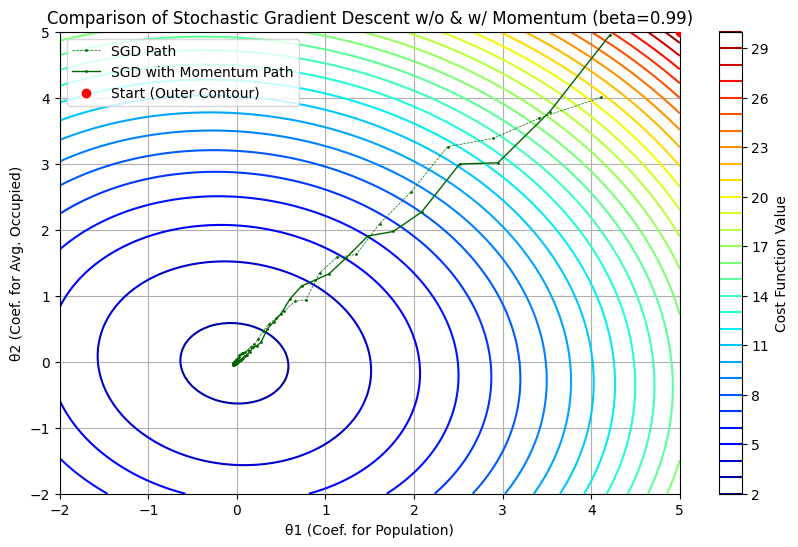

In [ ]:
# Run gradient descent from an outer contour (initial guess far from the optimal solution)
initial_theta_outer = np.array([5, 5])  # Start far from the optimal solution
theta_final_sgd, cost_history_sgd, theta_history_sgd = stochastic_gradient_descent(X_train, y_train, learning_rate=1e-5, epochs=100, initial_theta=initial_theta_outer)
theta_final_sgdm, cost_history_sgdm, theta_history_sgdm = stochastic_gradient_descent_with_momentum(X_train, y_train, learning_rate=1e-5, beta=0.99, epochs=100, initial_theta=initial_theta_outer)

# Plot the cost function contour (as concentric circles) in the parameter space
theta_1_vals = np.linspace(-2, 5, 100)
theta_2_vals = np.linspace(-2, 5, 100)
# theta_1_vals = np.linspace(-1, 1, 100)
# theta_2_vals = np.linspace(-1, 1, 100)
theta_1_grid, theta_2_grid = np.meshgrid(theta_1_vals, theta_2_vals)
cost_grid = np.zeros_like(theta_1_grid)

for i in range(len(theta_1_vals)):
    for j in range(len(theta_2_vals)):
        theta = np.array([theta_1_grid[i, j], theta_2_grid[i, j]])
        cost_grid[i, j] = compute_cost(theta, X_train, y_train)

# Plot contour lines for the cost function
plt.figure(figsize=(10, 6))
cp = plt.contour(theta_1_grid, theta_2_grid, cost_grid, levels=32, cmap='jet')
plt.colorbar(cp, label='Cost Function Value')

# Plot the paths for BGD, SGD, and MBGD
theta_history_sgd = np.array(theta_history_sgd)
theta_history_sgdm = np.array(theta_history_sgdm)

# SGD path
plt.plot(theta_history_sgd[:, 0], theta_history_sgd[:, 1], color='darkgreen', marker='o', linestyle='--', linewidth=0.5, markersize=1, label="SGD Path")
# SGD-Momentum path
plt.plot(theta_history_sgdm[:, 0], theta_history_sgdm[:, 1], color='darkgreen', marker='o', linewidth=1, markersize=1, label="SGD with Momentum Path")
# Mark the initial point (outer contour start)
plt.scatter(initial_theta_outer[0], initial_theta_outer[1], color='red', label="Start (Outer Contour)", zorder=5)

# Add labels and title
plt.xlabel('θ1 (Coef. for Population)')
plt.ylabel('θ2 (Coef. for Avg. Occupied)')
plt.title('Comparison of Stochastic Gradient Descent w/o & w/ Momentum (beta=0.99)')
plt.legend()
plt.grid(True)
plt.show()

----
##### Multiple minima in cost function space

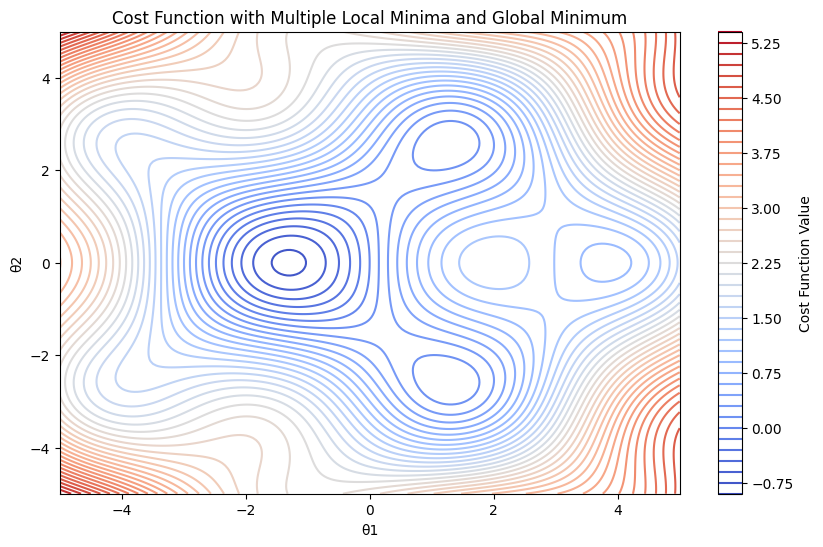

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Custom cost function with multiple local minima and one global minimum
def custom_cost_function(theta):
    theta_1, theta_2 = theta
    cost = np.sin(theta_1) * np.cos(theta_2) + 0.1 * (theta_1**2 + theta_2**2)
    return cost

# Gradient of the custom cost function
def custom_gradients(theta):
    theta_1, theta_2 = theta
    grad_theta_1 = np.cos(theta_1) * np.cos(theta_2) + 0.2 * theta_1
    grad_theta_2 = -np.sin(theta_1) * np.sin(theta_2) + 0.2 * theta_2
    return np.array([grad_theta_1, grad_theta_2])

# Generate grid for plotting
theta_1_vals = np.linspace(-5, 5, 200)
theta_2_vals = np.linspace(-5, 5, 200)
theta_1_grid, theta_2_grid = np.meshgrid(theta_1_vals, theta_2_vals)

# Compute cost on the grid
cost_grid = np.array([[custom_cost_function((t1, t2)) for t1, t2 in zip(row1, row2)]
                      for row1, row2 in zip(theta_1_grid, theta_2_grid)])

# Plot contour of the cost function
plt.figure(figsize=(10, 6))
cp = plt.contour(theta_1_grid, theta_2_grid, cost_grid, levels=50, cmap='coolwarm')
plt.colorbar(cp, label='Cost Function Value')
plt.title('Cost Function with Multiple Local Minima and Global Minimum')
plt.xlabel('θ1')
plt.ylabel('θ2')
plt.show()


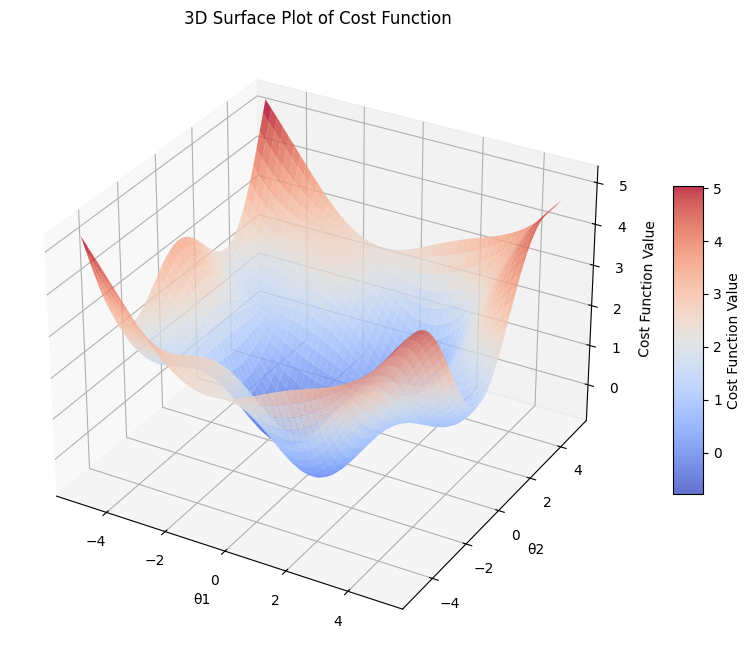

In [ ]:
# Custom cost function with multiple local minima and one global minimum
def custom_cost_function(theta):
    theta_1, theta_2 = theta
    cost = np.sin(theta_1) * np.cos(theta_2) + 0.1 * (theta_1**2 + theta_2**2)
    return cost

# Generate grid for plotting
theta_1_vals = np.linspace(-5, 5, 200)
theta_2_vals = np.linspace(-5, 5, 200)
theta_1_grid, theta_2_grid = np.meshgrid(theta_1_vals, theta_2_vals)

# Compute cost on the grid
cost_grid = np.array([[custom_cost_function((t1, t2)) for t1, t2 in zip(row1, row2)]
                      for row1, row2 in zip(theta_1_grid, theta_2_grid)])

# Create a 3D surface plot
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Surface plot
surf = ax.plot_surface(theta_1_grid, theta_2_grid, cost_grid, cmap='coolwarm', alpha=0.8)

# Add color bar
fig.colorbar(surf, ax=ax, shrink=0.5, aspect=10, label='Cost Function Value')

# Labels and title
ax.set_title('3D Surface Plot of Cost Function')
ax.set_xlabel('θ1')
ax.set_ylabel('θ2')
ax.set_zlabel('Cost Function Value')

plt.show()


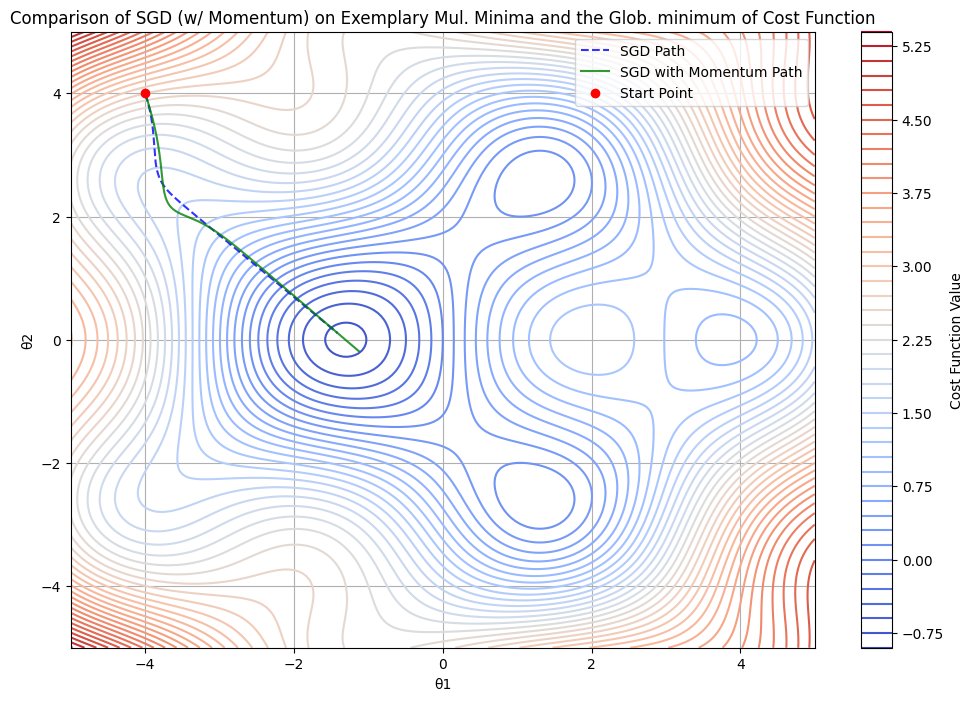

In [ ]:
# Custom cost function with multiple minima and global minimum
def custom_cost_function(theta):
    theta_1, theta_2 = theta
    return np.sin(theta_1) * np.cos(theta_2) + 0.1 * (theta_1**2 + theta_2**2)

# Gradient of the custom cost function
def custom_gradients(theta):
    theta_1, theta_2 = theta
    grad_theta_1 = np.cos(theta_1) * np.cos(theta_2) + 0.2 * theta_1
    grad_theta_2 = -np.sin(theta_1) * np.sin(theta_2) + 0.2 * theta_2
    return np.array([grad_theta_1, grad_theta_2])

#####################################
# General learning rule
# SGD for the custom cost function
def stochastic_gradient_descent_briefly(theta, learning_rate=0.01, epochs=200):
    theta_history = []
    for epoch in range(epochs):
        grad = custom_gradients(theta)
        theta -= learning_rate * grad
        theta_history.append(theta.copy())
    return theta, np.array(theta_history)

# SGD with momentum for the custom cost function
def stochastic_gradient_descent_with_momentum_briefly(theta, learning_rate=0.01, beta=0.9, epochs=200):
    theta_history = []
    velocity = np.zeros_like(theta)
    for epoch in range(epochs):
        grad = custom_gradients(theta)
        velocity = beta * velocity + (1 - beta) * grad
        theta -= learning_rate * velocity
        theta_history.append(theta.copy())
    return theta, np.array(theta_history)
#######################################

# Initial parameters
# initial_theta_outer = np.array([3.5, 3.5])  # Start far from global minimum
initial_theta_outer = np.array([-4., 4])  # Start the trace to choose the path either global minimum or local minima surface

# Perform gradient descent
theta_final_sgd, theta_history_sgd = stochastic_gradient_descent_briefly(initial_theta_outer.copy(), learning_rate=1e-2, epochs=1000)
theta_final_sgdm, theta_history_sgdm = stochastic_gradient_descent_with_momentum_briefly(initial_theta_outer.copy(), learning_rate=1e-2, beta=0.99, epochs=1000)

# Plot the cost function contours
theta_1_vals = np.linspace(-5, 5, 200)
theta_2_vals = np.linspace(-5, 5, 200)
theta_1_grid, theta_2_grid = np.meshgrid(theta_1_vals, theta_2_vals)
cost_grid = np.zeros_like(theta_1_grid)

for i in range(theta_1_grid.shape[0]):
    for j in range(theta_1_grid.shape[1]):
        theta = np.array([theta_1_grid[i, j], theta_2_grid[i, j]])
        cost_grid[i, j] = custom_cost_function(theta)

# Contour plot
plt.figure(figsize=(12, 8))
cp = plt.contour(theta_1_grid, theta_2_grid, cost_grid, levels=50, cmap='coolwarm')
plt.colorbar(cp, label='Cost Function Value')

# Plot the paths for SGD and SGD with momentum
plt.plot(theta_history_sgd[:, 0], theta_history_sgd[:, 1], 'b--', label='SGD Path', alpha=0.8)
plt.plot(theta_history_sgdm[:, 0], theta_history_sgdm[:, 1], 'g-', label='SGD with Momentum Path', alpha=0.8)

# Mark initial and final points
plt.scatter(initial_theta_outer[0], initial_theta_outer[1], color='red', label='Start Point', zorder=5)
# plt.scatter(theta_final_sgd[0], theta_final_sgd[1], color='blue', label='SGD End Point', zorder=5)
# plt.scatter(theta_final_sgdm[0], theta_final_sgdm[1], color='green', label='SGD Momentum End Point', zorder=5)

# Labels and title
plt.xlabel('θ1')
plt.ylabel('θ2')
plt.title('Comparison of SGD (w/ Momentum) on Exemplary Mul. Minima and the Glob. minimum of Cost Function')
plt.legend()
plt.grid(True)
plt.show()


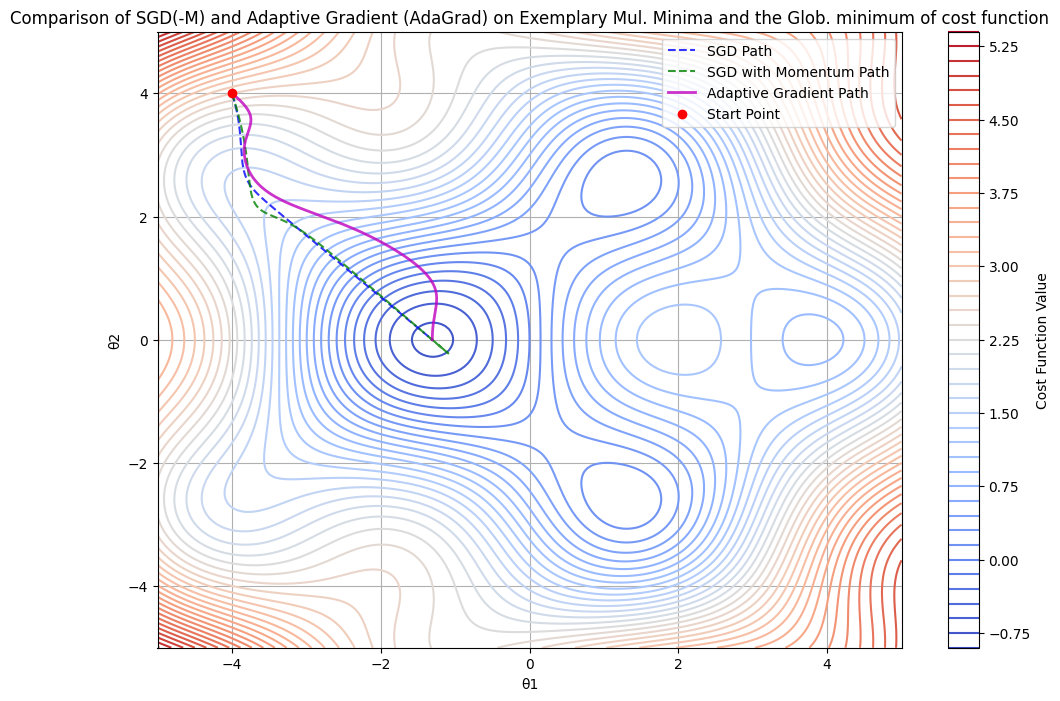

In [ ]:
# @title Adptive learning rule: Adaptive Gradient
#####################################
def adagrad_optimization(initial_theta, learning_rate=0.1, epsilon=1e-8, epochs=100):
    theta = np.array(initial_theta, dtype=np.float64)  # Starting point
    grad_squared_sum = np.zeros_like(theta, dtype=np.float64)  # Accumulated sum of squared gradients
    theta_history = []  # To record the optimization trajectory
    cost_history = []   # To record the cost function value at each step

    for epoch in range(epochs):
        gradients = custom_gradients(theta)  # Compute gradients
        grad_squared_sum += gradients**2    # Update the accumulated squared gradients
        adjusted_gradients = gradients / (np.sqrt(grad_squared_sum) + epsilon)  # Apply AdaGrad adjustment
        theta -= learning_rate * adjusted_gradients  # Update parameters

        theta_history.append(theta.copy())  # Record theta for the trajectory
        cost_history.append(custom_cost_function(theta))  # Record cost for analysis

        # Print progress every 10 epochs
        # if (epoch + 1) % 10 == 0:
        #     print(f"Epoch {epoch + 1}: Cost = {cost_history[-1]:.5f}, Theta = {theta}")

    return theta, np.array(theta_history) #, cost_history
#######################################

# Initial parameters
# initial_theta_outer = np.array([3.5, 3.5])  # Start far from global minimum
initial_theta_outer = np.array([-4., 4.])  # Start the trace to choose the path either global minimum or local minima surface

# Perform gradient descent
theta_final_sgd, theta_history_sgd = stochastic_gradient_descent_briefly(initial_theta_outer.copy(), learning_rate=1e-2, epochs=10000)
theta_final_sgdm, theta_history_sgdm = stochastic_gradient_descent_with_momentum_briefly(initial_theta_outer.copy(), learning_rate=1e-2, beta=0.99, epochs=10000)
theta_final_adagrad, theta_history_adagrad = adagrad_optimization(initial_theta_outer.copy(), learning_rate=5e-2, epsilon=1e-8, epochs=10000)

# Plot the cost function contours
theta_1_vals = np.linspace(-5, 5, 200)
theta_2_vals = np.linspace(-5, 5, 200)
theta_1_grid, theta_2_grid = np.meshgrid(theta_1_vals, theta_2_vals)
cost_grid = np.zeros_like(theta_1_grid)

for i in range(theta_1_grid.shape[0]):
    for j in range(theta_1_grid.shape[1]):
        theta = np.array([theta_1_grid[i, j], theta_2_grid[i, j]])
        cost_grid[i, j] = custom_cost_function(theta)

# Contour plot
plt.figure(figsize=(12, 8))
cp = plt.contour(theta_1_grid, theta_2_grid, cost_grid, levels=50, cmap='coolwarm')
plt.colorbar(cp, label='Cost Function Value')

# Plot the paths for SGD and SGD with momentum
plt.plot(theta_history_sgd[:, 0], theta_history_sgd[:, 1], 'b--', linewidth=1.5, label='SGD Path', alpha=0.8)
plt.plot(theta_history_sgdm[:, 0], theta_history_sgdm[:, 1], 'g--', linewidth=1.5, label='SGD with Momentum Path', alpha=0.8)
plt.plot(theta_history_adagrad[:, 0], theta_history_adagrad[:, 1], 'm-',linewidth=2, label='Adaptive Gradient Path', alpha=0.8)

# Mark initial and final points
plt.scatter(initial_theta_outer[0], initial_theta_outer[1], color='red', label='Start Point', zorder=5)
# plt.scatter(theta_final_sgd[0], theta_final_sgd[1], color='blue', label='SGD End Point', zorder=5)
# plt.scatter(theta_final_sgdm[0], theta_final_sgdm[1], color='green', label='SGD Momentum End Point', zorder=5)

# Labels and title
plt.xlabel('θ1')
plt.ylabel('θ2')
plt.title('Comparison of SGD(-M) and Adaptive Gradient (AdaGrad) on Exemplary Mul. Minima and the Glob. minimum of cost function')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# @title Other Adaptive learning rules
def adadelta_optimization(initial_theta, rho=0.95, epsilon=1e-8, epochs=100):
    theta = np.array(initial_theta, dtype=np.float64)  # Starting point
    accumulated_gradients = np.zeros_like(theta, dtype=np.float64)  # Squared gradients accumulator
    accumulated_updates = np.zeros_like(theta, dtype=np.float64)  # Squared updates accumulator
    theta_history = []  # For tracking optimization trajectory
    cost_history = []  # For tracking cost values

    for epoch in range(epochs):
        gradients = custom_gradients(theta)  # Compute gradients
        accumulated_gradients = rho * accumulated_gradients + (1 - rho) * gradients**2  # Update gradients accumulator
        adjusted_gradients = gradients / (np.sqrt(accumulated_gradients) + epsilon)  # Adjust gradients
        updates = -(np.sqrt(accumulated_updates) + epsilon) * adjusted_gradients  # Compute parameter updates
        accumulated_updates = rho * accumulated_updates + (1 - rho) * updates**2  # Update updates accumulator
        theta += updates  # Update parameters

        theta_history.append(theta.copy())
        cost_history.append(custom_cost_function(theta))

        # if (epoch + 1) % 10 == 0:
        #     print(f"Adadelta - Epoch {epoch + 1}: Cost = {cost_history[-1]:.5f}, Theta = {theta}")

    return theta, np.array(theta_history)#, cost_history


def rmsprop_optimization(initial_theta, learning_rate=0.01, beta=0.9, epsilon=1e-8, epochs=100):
    theta = np.array(initial_theta, dtype=np.float64)  # Starting point
    grad_squared_sum = np.zeros_like(theta, dtype=np.float64)  # Accumulated squared gradients
    theta_history = []  # For tracking optimization trajectory
    cost_history = []  # For tracking cost values

    for epoch in range(epochs):
        gradients = custom_gradients(theta)  # Compute gradients
        grad_squared_sum = beta * grad_squared_sum + (1 - beta) * gradients**2  # Update squared gradients
        adjusted_gradients = gradients / (np.sqrt(grad_squared_sum) + epsilon)  # Apply RMSProp scaling
        theta -= learning_rate * adjusted_gradients  # Update parameters

        theta_history.append(theta.copy())
        cost_history.append(custom_cost_function(theta))

        # if (epoch + 1) % 10 == 0:
        #     print(f"RMSProp - Epoch {epoch + 1}: Cost = {cost_history[-1]:.5f}, Theta = {theta}")

    return theta, np.array(theta_history)#, cost_history


def adam_optimization(initial_theta, learning_rate=0.01, beta1=0.9, beta2=0.999, epsilon=1e-8, epochs=100):
    theta = np.array(initial_theta, dtype=np.float64)  # Starting point
    m = np.zeros_like(theta, dtype=np.float64)  # First moment vector
    v = np.zeros_like(theta, dtype=np.float64)  # Second moment vector
    theta_history = []  # For tracking optimization trajectory
    cost_history = []  # For tracking cost values

    for epoch in range(1, epochs + 1):
        gradients = custom_gradients(theta)  # Compute gradients
        m = beta1 * m + (1 - beta1) * gradients  # Update biased first moment
        v = beta2 * v + (1 - beta2) * (gradients**2)  # Update biased second moment
        m_hat = m / (1 - beta1**epoch)  # Correct bias in first moment
        v_hat = v / (1 - beta2**epoch)  # Correct bias in second moment
        theta -= learning_rate * m_hat / (np.sqrt(v_hat) + epsilon)  # Update parameters

        theta_history.append(theta.copy())
        cost_history.append(custom_cost_function(theta))

        # if (epoch % 10 == 0):
        #     print(f"Adam - Epoch {epoch}: Cost = {cost_history[-1]:.5f}, Theta = {theta}")

    return theta, np.array(theta_history)#, cost_history



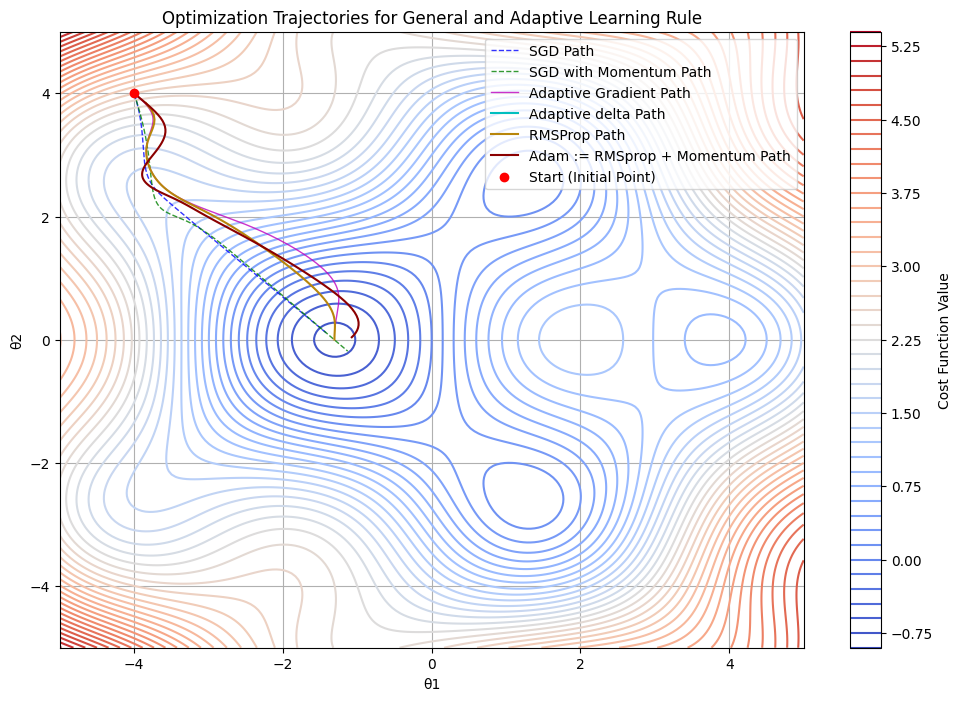

In [ ]:
# Initial point far from global minimum
initial_theta = np.array([-4., 4.])  # Start the trace to choose the path either global minimum or local minima surface

# Run optimizers
theta_final_sgd, theta_history_sgd = stochastic_gradient_descent_briefly(initial_theta.copy(), learning_rate=1e-2, epochs=1000)
theta_final_sgdm, theta_history_sgdm = stochastic_gradient_descent_with_momentum_briefly(initial_theta.copy(), learning_rate=1e-2, beta=0.99, epochs=1000)
theta_final_adagrad, theta_history_adagrad = adagrad_optimization(initial_theta.copy(), learning_rate=5e-2, epsilon=1e-8, epochs=2000)
final_theta_adadelta, theta_history_adadelta = adadelta_optimization(initial_theta.copy(), rho=0.95, epochs=100)
final_theta_rmsprop, theta_history_rmsprop = rmsprop_optimization(initial_theta.copy(), learning_rate=5e-2, epochs=100)
final_theta_adam, theta_history_adam = adam_optimization(initial_theta.copy(), learning_rate=5e-2, epochs=100)

# Plot the trajectories on the cost landscape
plt.figure(figsize=(12, 8))
cp = plt.contour(theta_1_grid, theta_2_grid, cost_grid, levels=50, cmap='coolwarm')
plt.colorbar(cp, label='Cost Function Value')

# Plot trajectories for each optimizer
# general lr
plt.plot(theta_history_sgd[:, 0], theta_history_sgd[:, 1], 'b--', linewidth=1., label='SGD Path', alpha=0.8)
plt.plot(theta_history_sgdm[:, 0], theta_history_sgdm[:, 1], 'g--', linewidth=1., label='SGD with Momentum Path', alpha=0.8)  # momentum method
# adaptive lr
plt.plot(theta_history_adagrad[:, 0], theta_history_adagrad[:, 1], 'm-', linewidth=1., label='Adaptive Gradient Path', alpha=0.8)
plt.plot(theta_history_adadelta[:, 0], theta_history_adadelta[:, 1], 'c-', linewidth=1.5, label="Adaptive delta Path")
plt.plot(theta_history_rmsprop[:, 0], theta_history_rmsprop[:, 1], color='darkgoldenrod', linewidth=1.5, label="RMSProp Path")
# adatpive + Momentum
plt.plot(theta_history_adam[:, 0], theta_history_adam[:, 1], color='darkred', linewidth=1.5, label="Adam := RMSprop + Momentum Path")

# Mark initial and final points
plt.scatter(initial_theta[0], initial_theta[1], color='red', label="Start (Initial Point)", zorder=5)
# plt.scatter(final_theta_adadelta[0], final_theta_adadelta[1], color='blue', label="Adadelta Final Point")
# plt.scatter(final_theta_rmsprop[0], final_theta_rmsprop[1], color='yellow', label="RMSProp Final Point")
# plt.scatter(final_theta_adam[0], final_theta_adam[1], color='cyan', label="Adam Final Point")

# Add plot details
plt.xlabel('θ1')
plt.ylabel('θ2')
plt.title("Optimization Trajectories for General and Adaptive Learning Rule")
plt.legend()
plt.grid(True)
plt.show()


##### Initialize gradient points far from global minimum with obstacle local minima

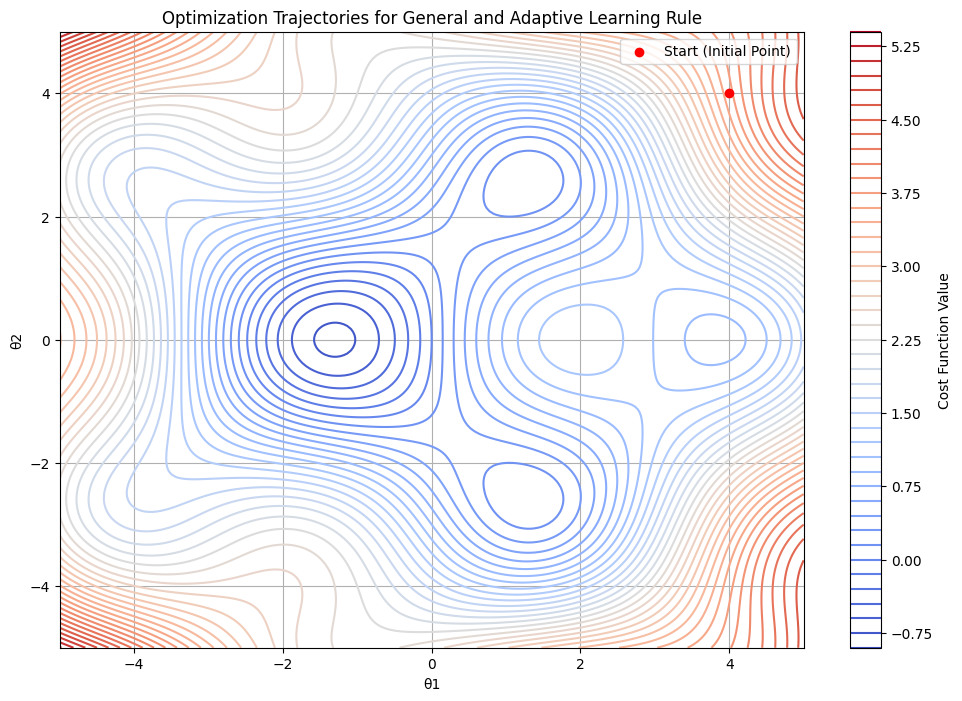

In [3]:
# Initial point far from global minimum
initial_theta = np.array([4., 4.])  # Start far from global minimum


# Plot the trajectories on the cost landscape
plt.figure(figsize=(12, 8))
cp = plt.contour(theta_1_grid, theta_2_grid, cost_grid, levels=50, cmap='coolwarm')
plt.colorbar(cp, label='Cost Function Value')

# Mark initial and final points
plt.scatter(initial_theta[0], initial_theta[1], color='red', label="Start (Initial Point)", zorder=5)
# plt.scatter(final_theta_adadelta[0], final_theta_adadelta[1], color='blue', label="Adadelta Final Point")
# plt.scatter(final_theta_rmsprop[0], final_theta_rmsprop[1], color='yellow', label="RMSProp Final Point")
# plt.scatter(final_theta_adam[0], final_theta_adam[1], color='cyan', label="Adam Final Point")

# Add plot details
plt.xlabel('θ1')
plt.ylabel('θ2')
plt.title("Optimization Trajectories for General and Adaptive Learning Rule")
plt.legend()
plt.grid(True)
plt.show()

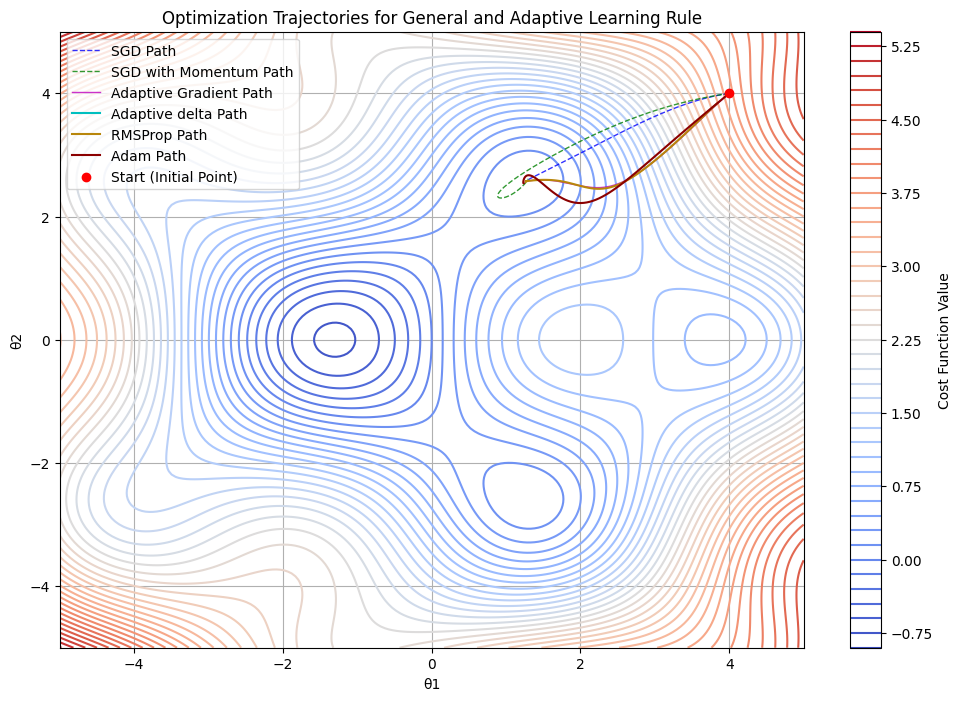

In [ ]:
# Initial point far from global minimum
initial_theta = np.array([4., 4.])  # Start far from global minimum

# Run optimizers
theta_final_sgd, theta_history_sgd = stochastic_gradient_descent_briefly(initial_theta.copy(), learning_rate=1e-2, epochs=1000)
theta_final_sgdm, theta_history_sgdm = stochastic_gradient_descent_with_momentum_briefly(initial_theta.copy(), learning_rate=1e-2, beta=0.99, epochs=1000)
theta_final_adagrad, theta_history_adagrad = adagrad_optimization(initial_theta.copy(), learning_rate=5e-2, epsilon=1e-8, epochs=2000)
final_theta_adadelta, theta_history_adadelta = adadelta_optimization(initial_theta.copy(), rho=0.95, epochs=100)
final_theta_rmsprop, theta_history_rmsprop = rmsprop_optimization(initial_theta.copy(), learning_rate=5e-2, epochs=100)
final_theta_adam, theta_history_adam = adam_optimization(initial_theta.copy(), learning_rate=5e-2, beta1=0.9, beta2=0.999, epochs=100)

# Plot the trajectories on the cost landscape
plt.figure(figsize=(12, 8))
cp = plt.contour(theta_1_grid, theta_2_grid, cost_grid, levels=50, cmap='coolwarm')
plt.colorbar(cp, label='Cost Function Value')

# Plot trajectories for each optimizer
# general lr
plt.plot(theta_history_sgd[:, 0], theta_history_sgd[:, 1], 'b--', linewidth=1., label='SGD Path', alpha=0.8)
plt.plot(theta_history_sgdm[:, 0], theta_history_sgdm[:, 1], 'g--', linewidth=1., label='SGD with Momentum Path', alpha=0.8)  # momentum method
# adaptive lr
plt.plot(theta_history_adagrad[:, 0], theta_history_adagrad[:, 1], 'm-', linewidth=1., label='Adaptive Gradient Path', alpha=0.8)
plt.plot(theta_history_adadelta[:, 0], theta_history_adadelta[:, 1], 'c-', linewidth=1.5, label="Adaptive delta Path")
plt.plot(theta_history_rmsprop[:, 0], theta_history_rmsprop[:, 1], color='darkgoldenrod', linewidth=1.5, label="RMSProp Path")
# adatpive + Momentum
plt.plot(theta_history_adam[:, 0], theta_history_adam[:, 1], color='darkred', linewidth=1.5, label="Adam Path")

# Mark initial and final points
plt.scatter(initial_theta[0], initial_theta[1], color='red', label="Start (Initial Point)", zorder=5)
# plt.scatter(final_theta_adadelta[0], final_theta_adadelta[1], color='blue', label="Adadelta Final Point")
# plt.scatter(final_theta_rmsprop[0], final_theta_rmsprop[1], color='yellow', label="RMSProp Final Point")
# plt.scatter(final_theta_adam[0], final_theta_adam[1], color='cyan', label="Adam Final Point")

# Add plot details
plt.xlabel('θ1')
plt.ylabel('θ2')
plt.title("Optimization Trajectories for General and Adaptive Learning Rule")
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
# @title General/Adaptive learning rule + decay rate
# SGD with momentum for the custom cost function
def sgdm_decay(theta, learning_rate=0.01, beta=0.9, decay_rate=0.1, epochs=200):
    theta_history = []
    velocity = np.zeros_like(theta)
    for epoch in range(epochs):
        ########################################################
        # Adjust learning rate using the scheduler
        learning_rate = learning_rate * np.exp(-decay_rate * epoch)
        ########################################################
        grad = custom_gradients(theta)
        velocity = beta * velocity + (1 - beta) * grad
        theta -= learning_rate * velocity
        theta_history.append(theta.copy())
    return theta, np.array(theta_history)

def adagrad_decay(initial_theta, learning_rate=0.1, epsilon=1e-8, decay_rate=0.1, epochs=100):
    theta = np.array(initial_theta, dtype=np.float64)  # Starting point
    grad_squared_sum = np.zeros_like(theta, dtype=np.float64)  # Accumulated sum of squared gradients
    theta_history = []  # To record the optimization trajectory
    cost_history = []   # To record the cost function value at each step

    for epoch in range(epochs):
        ########################################################
        # Adjust learning rate using the scheduler
        learning_rate = learning_rate * np.exp(-decay_rate * epoch)
        ########################################################
        gradients = custom_gradients(theta)  # Compute gradients
        grad_squared_sum += gradients**2    # Update the accumulated squared gradients
        adjusted_gradients = gradients / (np.sqrt(grad_squared_sum) + epsilon)  # Apply AdaGrad adjustment
        theta -= learning_rate * adjusted_gradients  # Update parameters

        theta_history.append(theta.copy())  # Record theta for the trajectory
        cost_history.append(custom_cost_function(theta))  # Record cost for analysis

    return theta, np.array(theta_history) #, cost_history

def rmsprop_decay(initial_theta, learning_rate=0.01, rho=0.9, epsilon=1e-8, decay_rate=0.1, epochs=100):
    theta = np.array(initial_theta, dtype=np.float64)  # Starting point
    grad_squared_sum = np.zeros_like(theta, dtype=np.float64)  # Accumulated squared gradients
    theta_history = []  # For tracking optimization trajectory
    cost_history = []  # For tracking cost values

    for epoch in range(epochs):
        ########################################################
        # Adjust learning rate using the scheduler
        learning_rate = learning_rate * np.exp(-decay_rate * epoch)
        ########################################################
        gradients = custom_gradients(theta)  # Compute gradients
        grad_squared_sum = rho * grad_squared_sum + (1 - rho) * gradients**2  # Update squared gradients
        adjusted_gradients = gradients / (np.sqrt(grad_squared_sum) + epsilon)  # Apply RMSProp scaling
        theta -= learning_rate * adjusted_gradients  # Update parameters

        theta_history.append(theta.copy())
        cost_history.append(custom_cost_function(theta))

        # if (epoch + 1) % 10 == 0:
        #     print(f"RMSProp - Epoch {epoch + 1}: Cost = {cost_history[-1]:.5f}, Theta = {theta}")

    return theta, np.array(theta_history)#, cost_history


def adam_decay(initial_theta, learning_rate=0.01, beta1=0.9, beta2=0.999, epsilon=1e-8, decay_rate=0.1, epochs=100):
    theta = np.array(initial_theta, dtype=np.float64)  # Starting point
    m = np.zeros_like(theta, dtype=np.float64)  # First moment vector
    v = np.zeros_like(theta, dtype=np.float64)  # Second moment vector
    theta_history = []  # For tracking optimization trajectory
    cost_history = []  # For tracking cost values
    for epoch in range(1, epochs + 1):
        ########################################################
        # Adjust learning rate using the scheduler
        learning_rate = learning_rate * np.exp(-decay_rate * epoch)
        ########################################################
        gradients = custom_gradients(theta)  # Compute gradients
        m = beta1 * m + (1 - beta1) * gradients  # Update biased first moment
        v = beta2 * v + (1 - beta2) * (gradients**2)  # Update biased second moment
        m_hat = m / (1 - beta1**epoch)  # Correct bias in first moment
        v_hat = v / (1 - beta2**epoch)  # Correct bias in second moment
        theta -= learning_rate * m_hat / (np.sqrt(v_hat) + epsilon)  # Update parameters

        theta_history.append(theta.copy())
        cost_history.append(custom_cost_function(theta))

        # if (epoch % 10 == 0):
        #     print(f"Adam - Epoch {epoch}: Cost = {cost_history[-1]:.5f}, Theta = {theta}")

    return theta, np.array(theta_history)#, cost_history



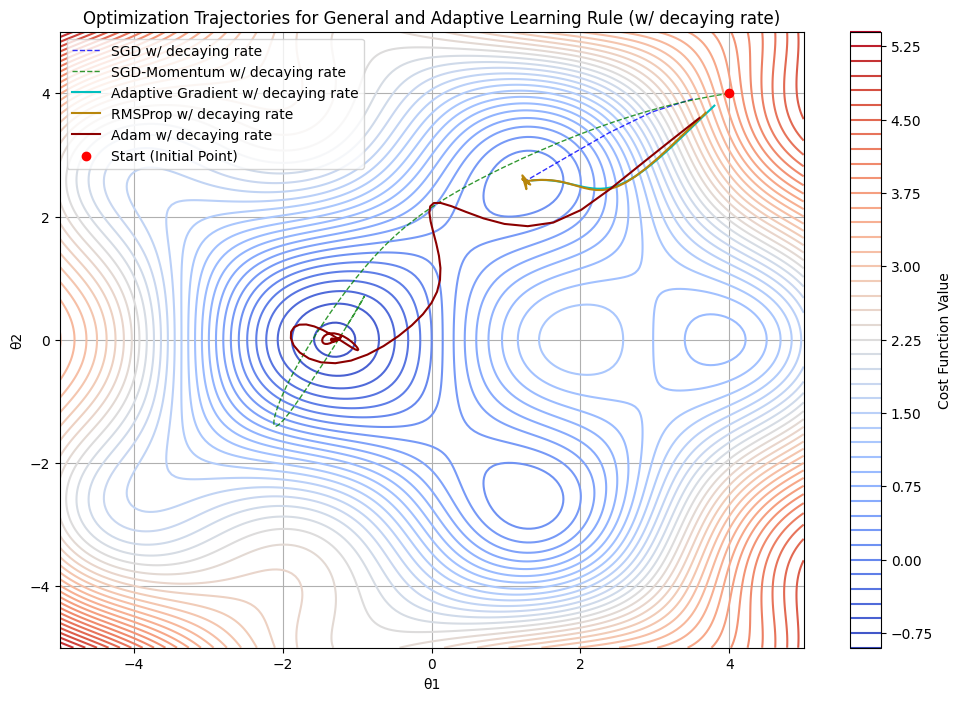

In [ ]:
# Initial point far from global minimum
initial_theta = np.array([4., 4.])  # Start far from global minimum

# Run optimizers
theta_final_sgd, theta_history_sgd = sgdm_decay(initial_theta.copy(), learning_rate=4e-1, decay_rate=1e-4, beta=0., epochs=10000) # non-momentum method
theta_final_sgdm, theta_history_sgdm = sgdm_decay(initial_theta.copy(), learning_rate=4e-1, decay_rate=1e-4, beta=0.99, epochs=10000) # momentum method
final_theta_adagrad, theta_history_adagrad = adagrad_decay(initial_theta.copy(), learning_rate=2e-1, decay_rate=1e-4, epochs=10000)
final_theta_rmsprop, theta_history_rmsprop = rmsprop_decay(initial_theta.copy(), learning_rate=1e-1, decay_rate=1e-4, epochs=10000)
final_theta_adam, theta_history_adam = adam_decay(initial_theta.copy(), learning_rate=4e-1, decay_rate=1e-4, beta1=0.9, beta2=0.999, epochs=10000)

# Plot the trajectories on the cost landscape
plt.figure(figsize=(12, 8))
cp = plt.contour(theta_1_grid, theta_2_grid, cost_grid, levels=50, cmap='coolwarm')
plt.colorbar(cp, label='Cost Function Value')

# Plot trajectories for each optimizer
# general lr
plt.plot(theta_history_sgd[:, 0], theta_history_sgd[:, 1], 'b--', linewidth=1., label='SGD w/ decaying rate', alpha=0.8)  # non-momentum method
plt.plot(theta_history_sgdm[:, 0], theta_history_sgdm[:, 1], 'g--', linewidth=1., label='SGD-Momentum w/ decaying rate', alpha=0.8)  # momentum method
# adaptive lr
plt.plot(theta_history_adagrad[:, 0], theta_history_adagrad[:, 1], 'c-', linewidth=1.5, label="Adaptive Gradient w/ decaying rate")
plt.plot(theta_history_rmsprop[:, 0], theta_history_rmsprop[:, 1], color='darkgoldenrod', linewidth=1.5, label="RMSProp w/ decaying rate")
# adatpive + Momentum
plt.plot(theta_history_adam[:, 0], theta_history_adam[:, 1], color='darkred', linewidth=1.5, label="Adam w/ decaying rate")

# Mark initial and final points
plt.scatter(initial_theta[0], initial_theta[1], color='red', label="Start (Initial Point)", zorder=5)
# plt.scatter(final_theta_adadelta[0], final_theta_adadelta[1], color='blue', label="Adadelta Final Point")
# plt.scatter(final_theta_rmsprop[0], final_theta_rmsprop[1], color='yellow', label="RMSProp Final Point")
# plt.scatter(final_theta_adam[0], final_theta_adam[1], color='cyan', label="Adam Final Point")

# Add plot details
plt.xlabel('θ1')
plt.ylabel('θ2')
plt.title("Optimization Trajectories for General and Adaptive Learning Rule (w/ decaying rate)")
plt.legend()
plt.grid(True)
plt.show()
